# ELAIS-N1 master catalogue
## Checks and diagnostics

In [1]:
from herschelhelp_internal import git_version
print("This notebook was run with herschelhelp_internal version: \n{}".format(git_version()))

This notebook was run with herschelhelp_internal version: 
be7d970 (Mon Jun 26 17:22:59 2017 +0100)


In [2]:
%matplotlib inline
#%config InlineBackend.figure_format = 'svg'

import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))

import locale
locale.setlocale(locale.LC_ALL, 'en_GB')

import os
import time
import itertools

from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import units as u
import numpy as np
from matplotlib_venn import venn3

from herschelhelp_internal.masterlist import nb_compare_mags

In [3]:
OUT_DIR = os.environ.get('OUT_DIR', "./data")
#SUFFIX = os.environ.get('SUFFIX', time.strftime("_%Y%m%d"))
SUFFIX = "_20170623"

master_catalogue = Table.read("{}/master_catalogue_elais-n1{}.fits".format(OUT_DIR, SUFFIX))

## I - Summary of wavelength domains

In [4]:
flag_obs = master_catalogue['flag_optnir_obs']
flag_det = master_catalogue['flag_optnir_det']

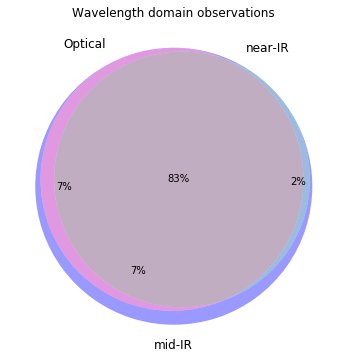

In [5]:
venn3(
    [
        np.sum(flag_obs == 4),
        np.sum(flag_obs == 2),
        np.sum(flag_obs == 6),
        np.sum(flag_obs == 1),
        np.sum(flag_obs == 5),
        np.sum(flag_obs == 3),
        np.sum(flag_obs == 7)
    ],
    set_labels=('Optical', 'near-IR', 'mid-IR'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/len(flag_obs)))
)
plt.title("Wavelength domain observations");

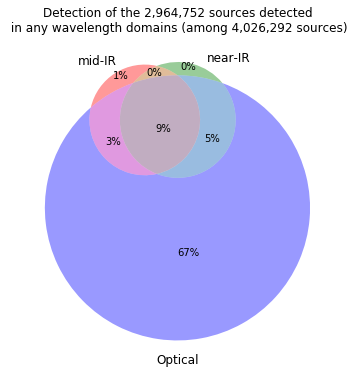

In [6]:
venn3(
    [
        np.sum(flag_det[flag_obs == 7] == 4),
        np.sum(flag_det[flag_obs == 7] == 2),
        np.sum(flag_det[flag_obs == 7] == 6),
        np.sum(flag_det[flag_obs == 7] == 1),
        np.sum(flag_det[flag_obs == 7] == 5),
        np.sum(flag_det[flag_obs == 7] == 3),
        np.sum(flag_det[flag_obs == 7] == 7)
    ],
    set_labels=('mid-IR', 'near-IR', 'Optical'),
    subset_label_formatter=lambda x: "{}%".format(int(100*x/np.sum(flag_det != 0)))
)
plt.title("Detection of the {} sources detected\n in any wavelength domains "
          "(among {} sources)".format(
              locale.format('%d', np.sum(flag_det != 0), grouping=True),
              locale.format('%d', len(flag_det), grouping=True)));

## II - Comparing magnitudes in similar filters

The master list if composed of several catalogues containing magnitudes in similar filters on different instruments. We are comparing the magnitudes in these corresponding filters.

In [7]:
u_bands = ["WFC u", "CFHT Megacam u"]
g_bands = ["WFC g", "CFHT Megacam g", "SUPRIME g", "GPC1 g"]
r_bands = ["WFC r", "CFHT Megacam r", "SUPRIME r", "GPC1 r"]
i_bands = ["WFC i", "SUPRIME i", "GPC1 i"]
z_bands = ["WFC z", "CFHT Megacam z", "SUPRIME z", "GPC1 z"]
y_bands = ["SUPRIME y", "GPC1 y"]

CFHT Megacam u (aperture) - WFC u (aperture) min / max: -8.317928314208984 / 12.369986534118652


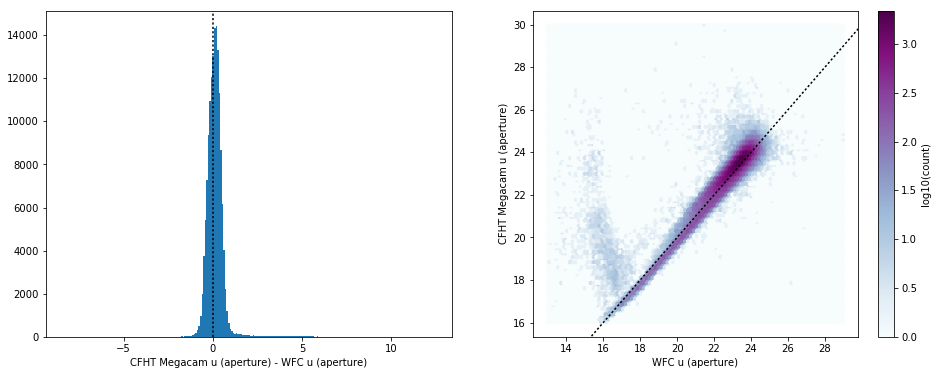

CFHT Megacam u (total) - WFC u (total) min / max: -7.089723587036133 / 11.02729606628418


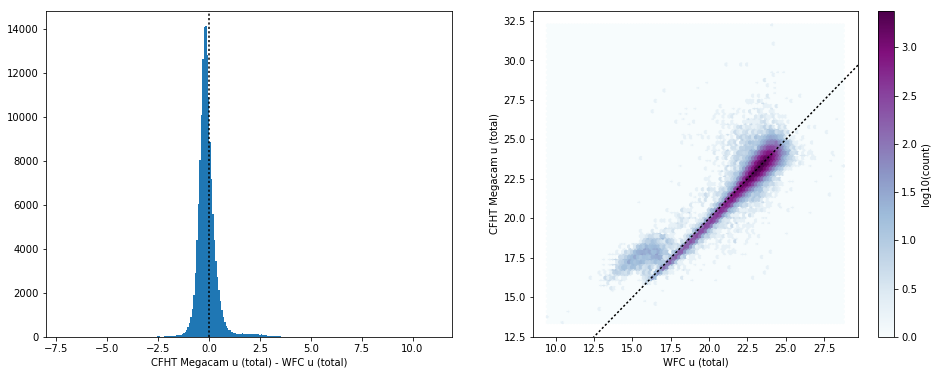

CFHT Megacam g (aperture) - WFC g (aperture) min / max: -5.233160018920898 / 13.249391555786133


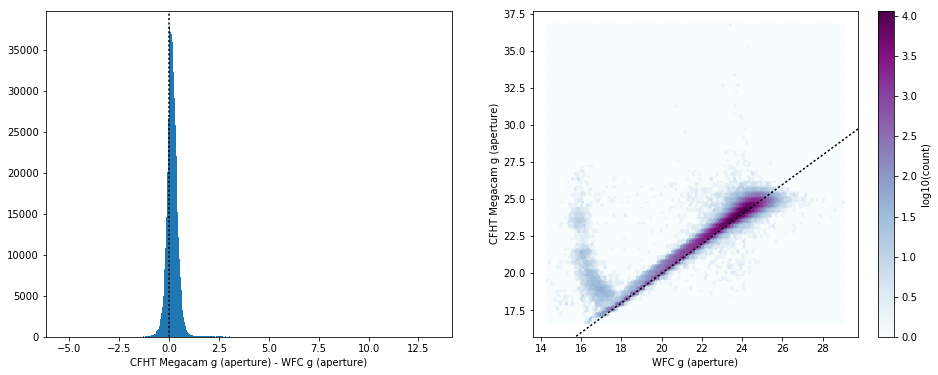

CFHT Megacam g (total) - WFC g (total) min / max: -7.359111785888672 / 13.385894775390625


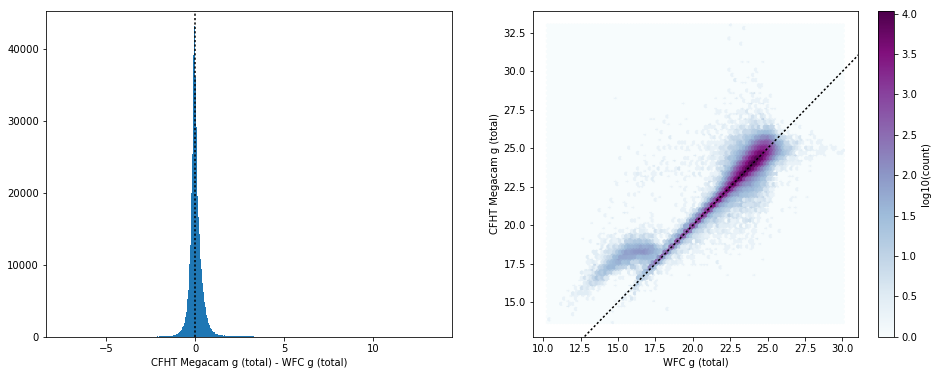

SUPRIME g (aperture) - WFC g (aperture) min / max: -4.712705612182617 / 47.03491973876953


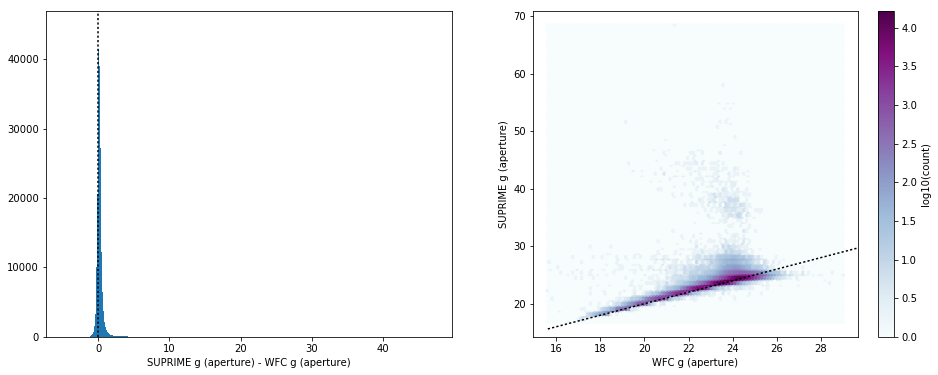

SUPRIME g (total) - WFC g (total) min / max: -6.363412857055664 / 31.979846954345703


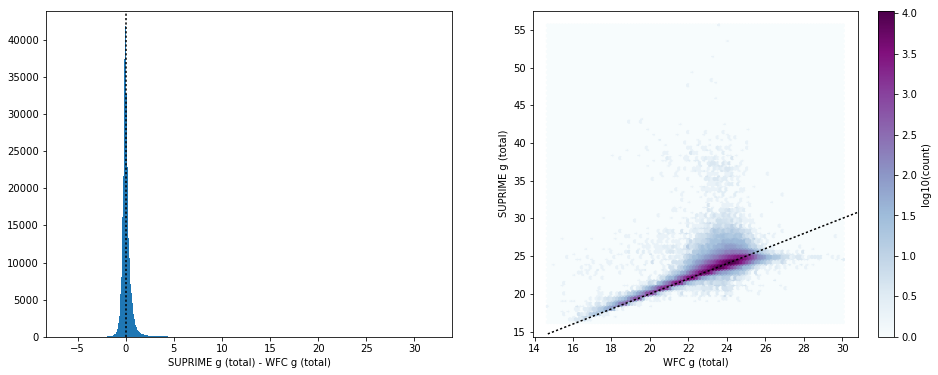

GPC1 g (aperture) - WFC g (aperture) min / max: -5.8217010498046875 / 12.710599899291992


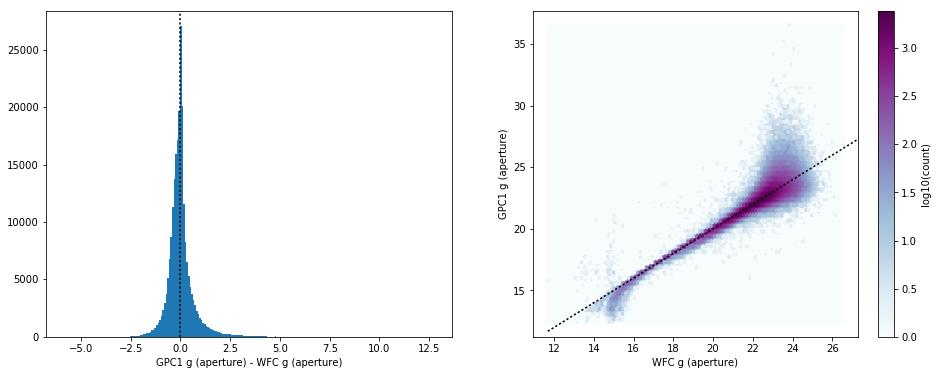

GPC1 g (total) - WFC g (total) min / max: -7.499200820922852 / 7.945899963378906


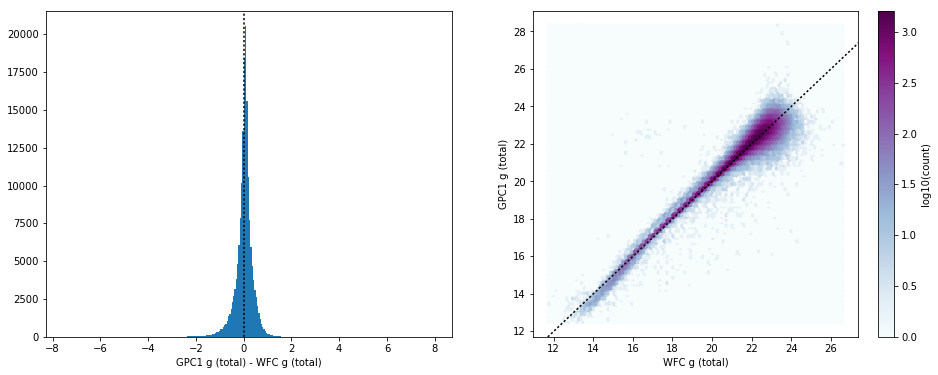

SUPRIME g (aperture) - CFHT Megacam g (aperture) min / max: -8.127212524414062 / 33.80033874511719


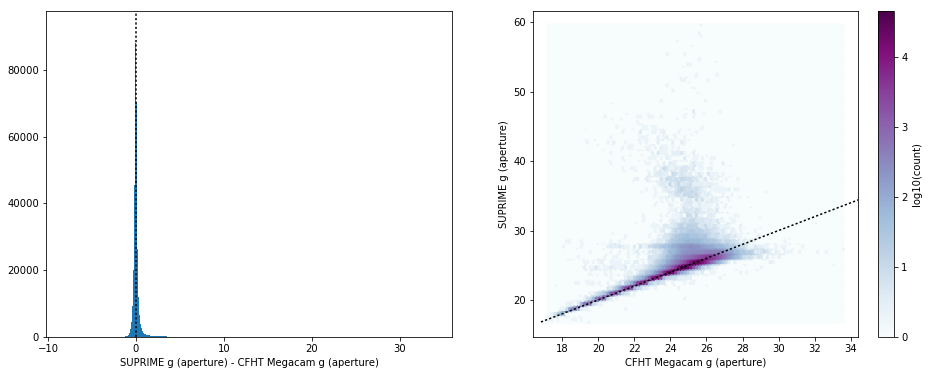

SUPRIME g (total) - CFHT Megacam g (total) min / max: -12.494380950927734 / 34.70111846923828


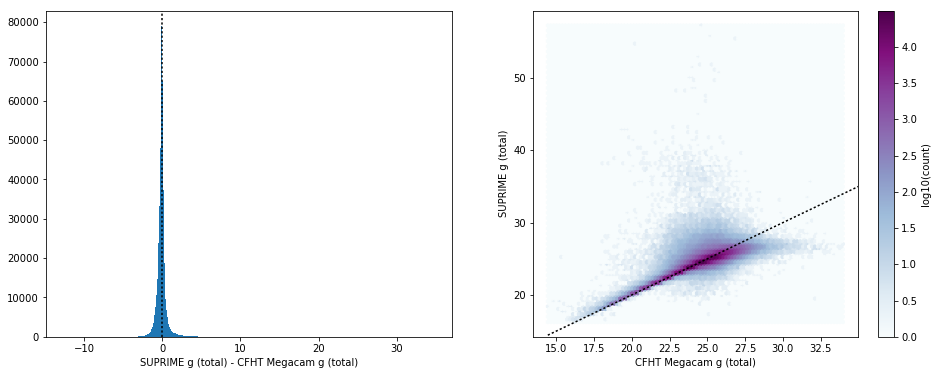

GPC1 g (aperture) - CFHT Megacam g (aperture) min / max: -13.318090438842773 / 12.84040641784668


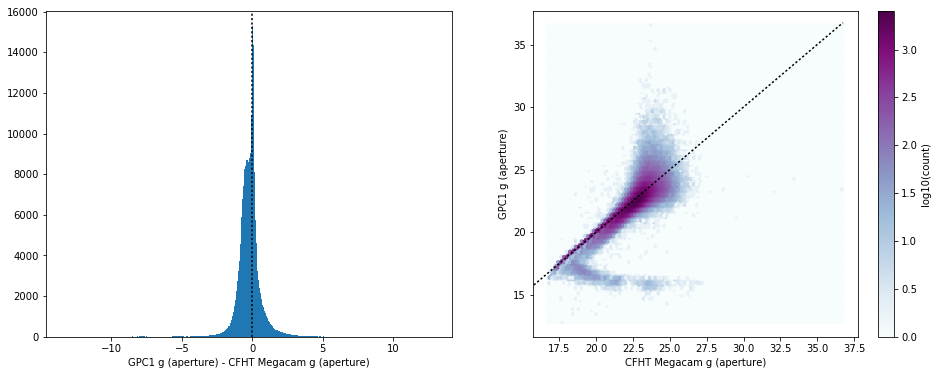

GPC1 g (total) - CFHT Megacam g (total) min / max: -10.773859024047852 / 4.7452545166015625


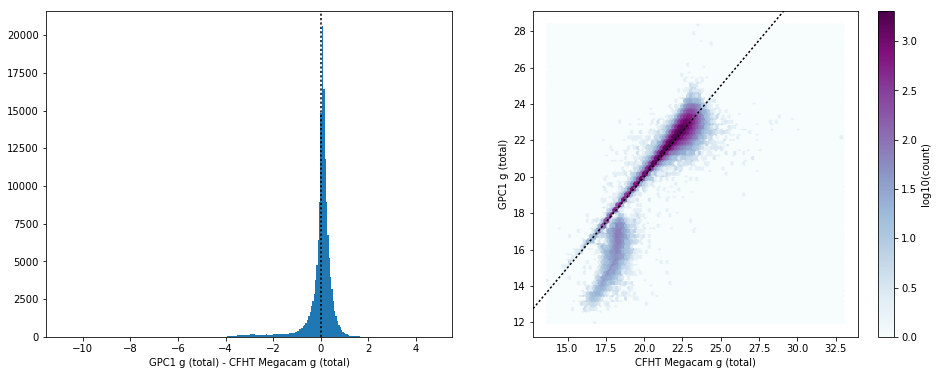

GPC1 g (aperture) - SUPRIME g (aperture) min / max: -47.281721115112305 / 11.26664924621582


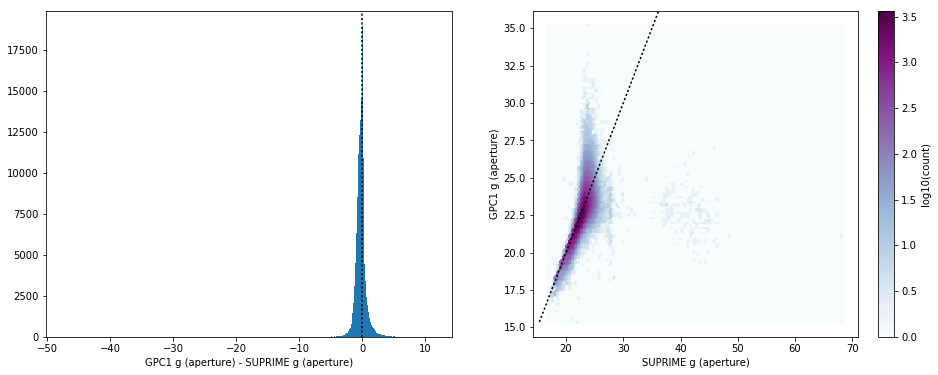

GPC1 g (total) - SUPRIME g (total) min / max: -23.504730224609375 / 4.665857315063477


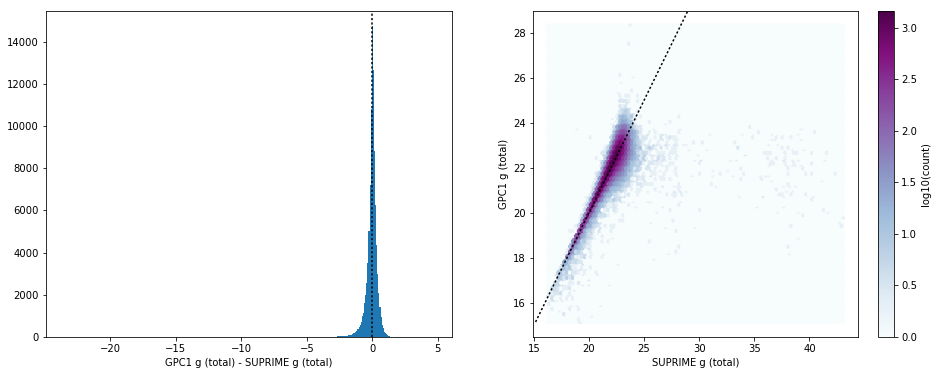

CFHT Megacam r (aperture) - WFC r (aperture) min / max: -5.598031997680664 / 13.370298385620117


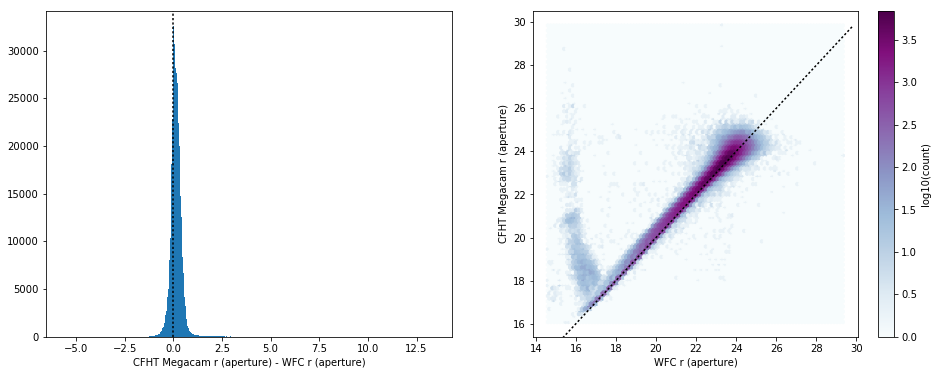

CFHT Megacam r (total) - WFC r (total) min / max: -8.268135070800781 / 11.734338760375977


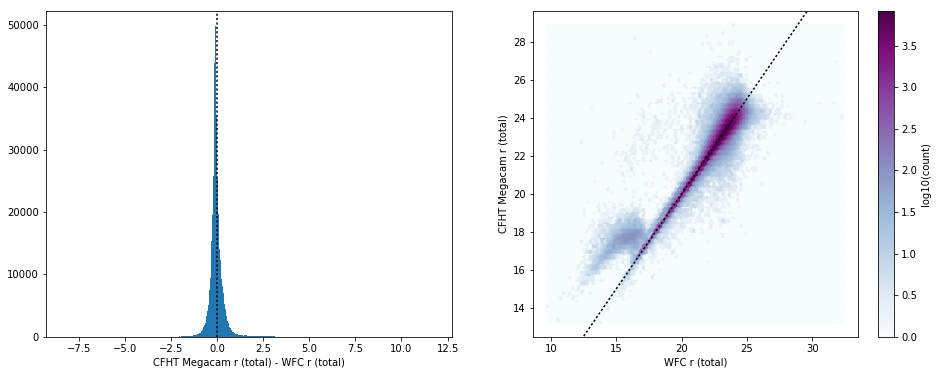

SUPRIME r (aperture) - WFC r (aperture) min / max: -5.611766815185547 / 38.40736770629883


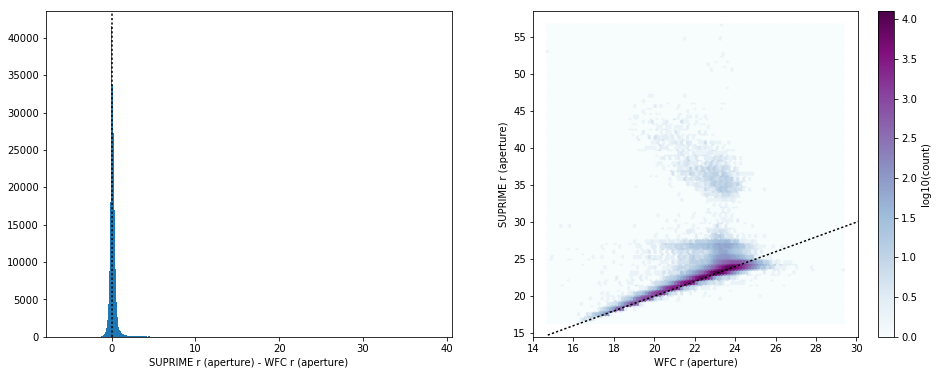

SUPRIME r (total) - WFC r (total) min / max: -8.229608535766602 / 33.31153106689453


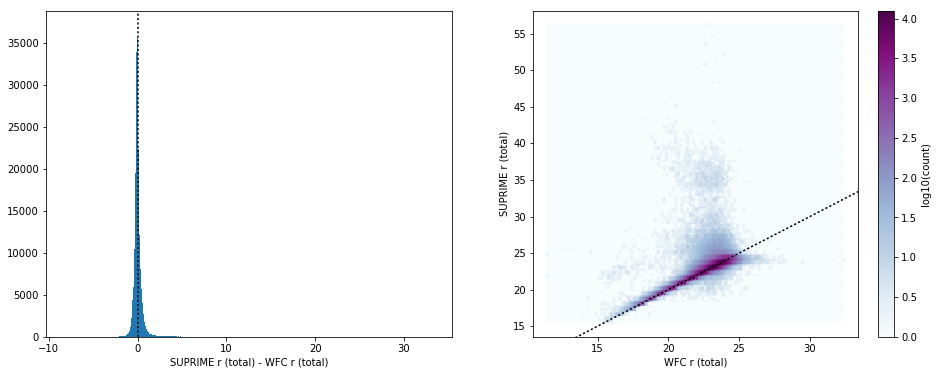

GPC1 r (aperture) - WFC r (aperture) min / max: -5.838800430297852 / 9.750600814819336


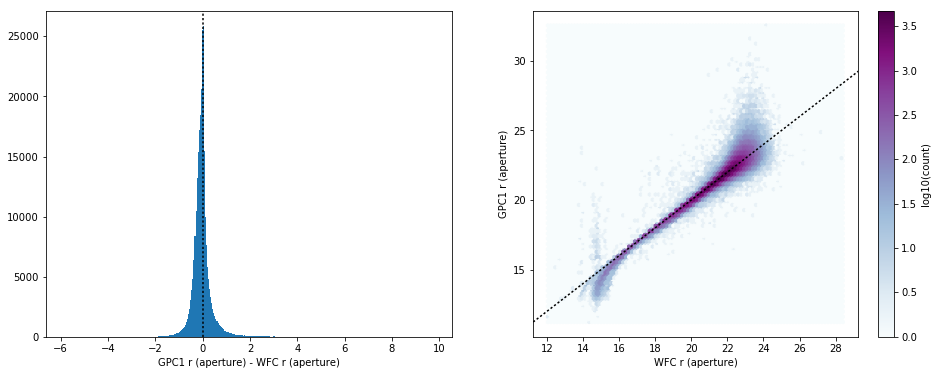

GPC1 r (total) - WFC r (total) min / max: -7.703699111938477 / 8.159499168395996


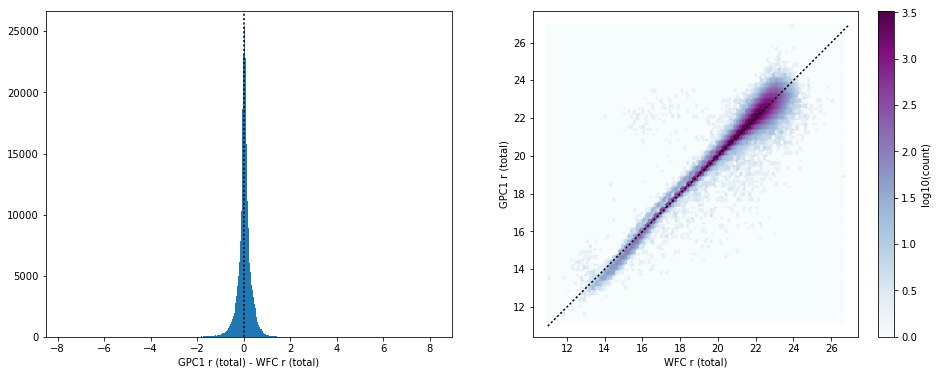

SUPRIME r (aperture) - CFHT Megacam r (aperture) min / max: -7.23277473449707 / 33.062049865722656


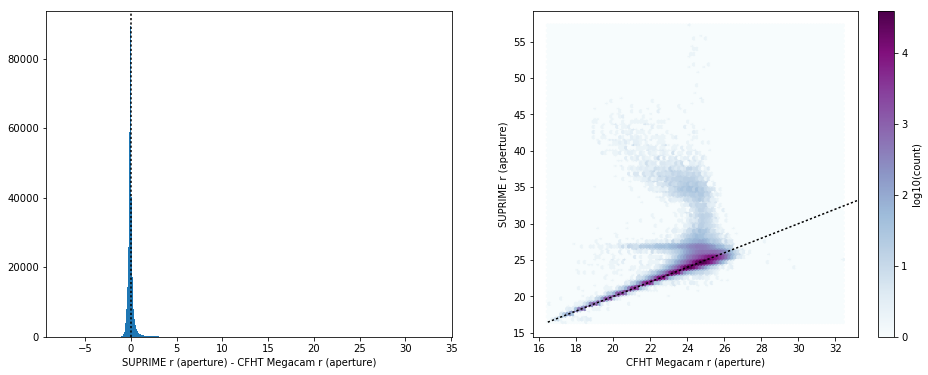

SUPRIME r (total) - CFHT Megacam r (total) min / max: -8.791389465332031 / 30.27062225341797


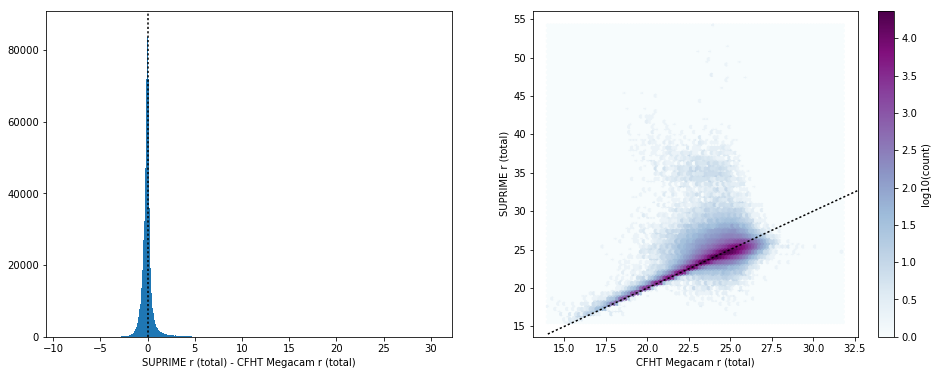

GPC1 r (aperture) - CFHT Megacam r (aperture) min / max: -13.84579849243164 / 8.519594192504883


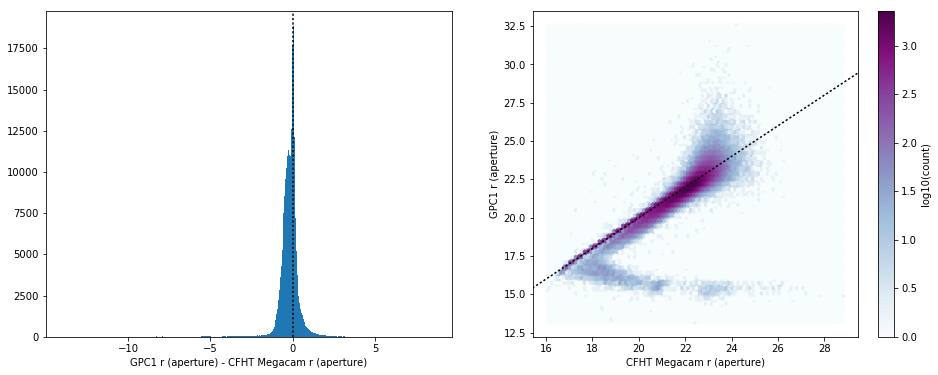

GPC1 r (total) - CFHT Megacam r (total) min / max: -12.175939559936523 / 5.1621246337890625


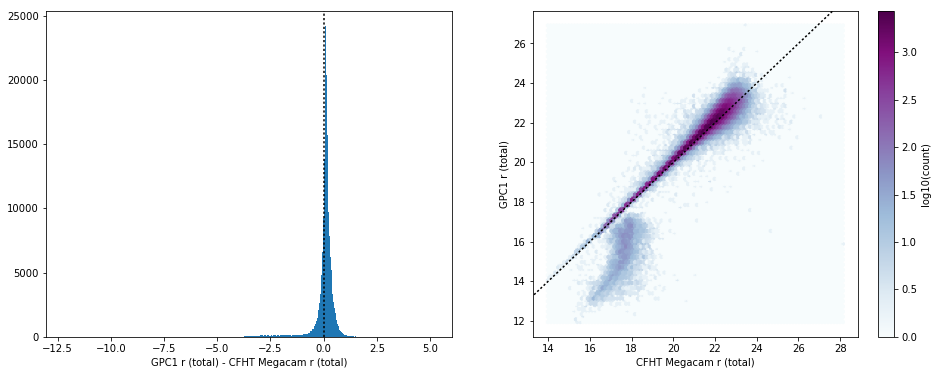

GPC1 r (aperture) - SUPRIME r (aperture) min / max: -27.661619186401367 / 8.504722595214844


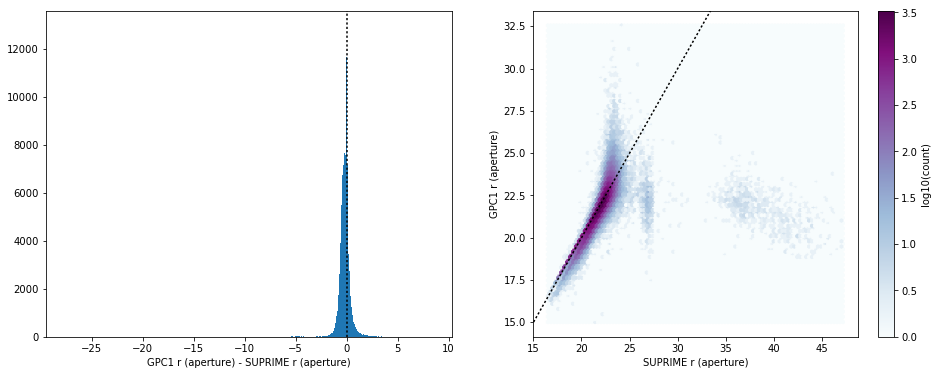

GPC1 r (total) - SUPRIME r (total) min / max: -26.570743560791016 / 2.9275436401367188


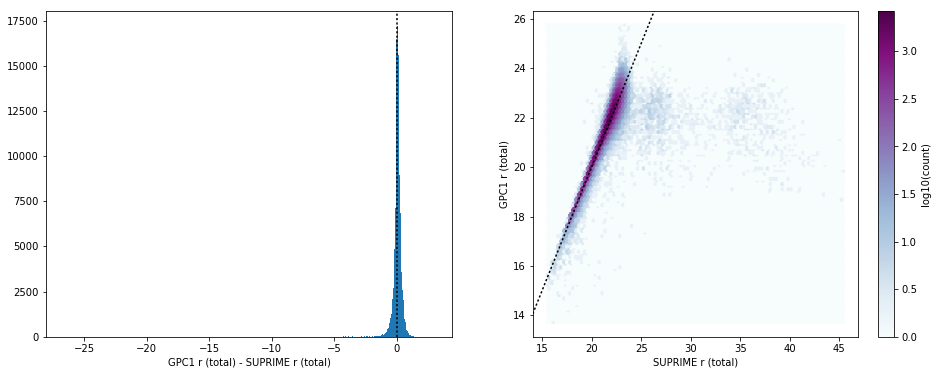

SUPRIME i (aperture) - WFC i (aperture) min / max: -7.794902801513672 / 24.73282814025879


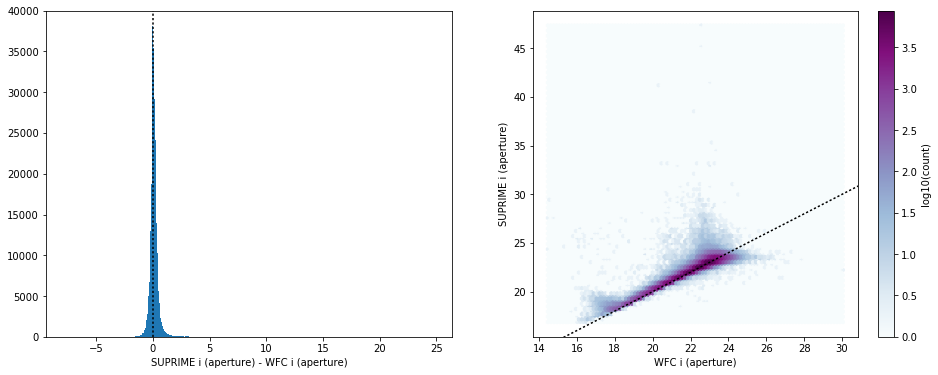

SUPRIME i (total) - WFC i (total) min / max: -6.9937286376953125 / 27.258581161499023


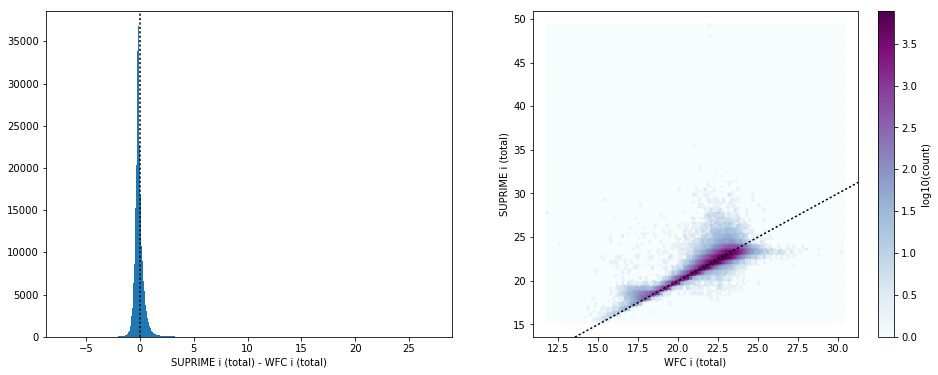

GPC1 i (aperture) - WFC i (aperture) min / max: -5.751899719238281 / 8.122200012207031


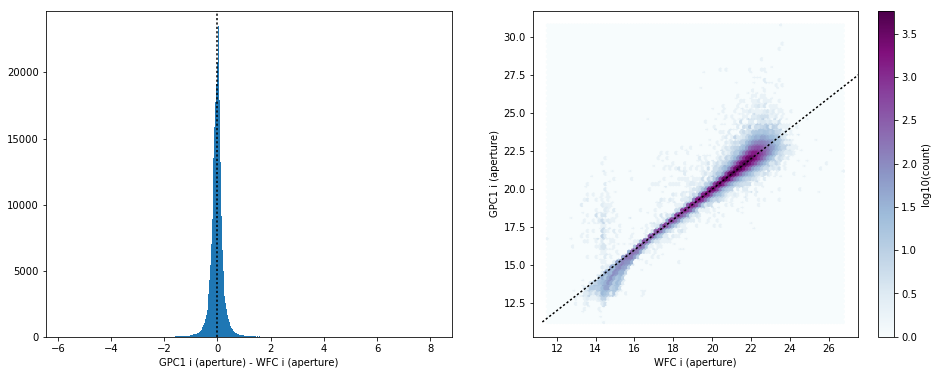

GPC1 i (total) - WFC i (total) min / max: -9.153600692749023 / 7.193600654602051


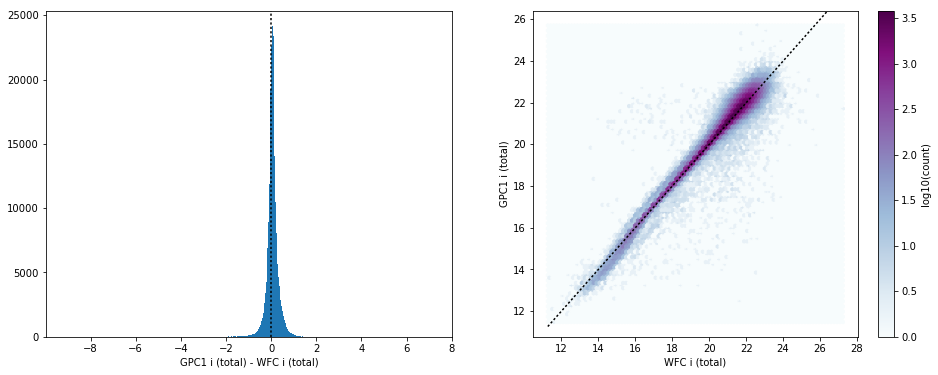

GPC1 i (aperture) - SUPRIME i (aperture) min / max: -21.059526443481445 / 7.880029678344727


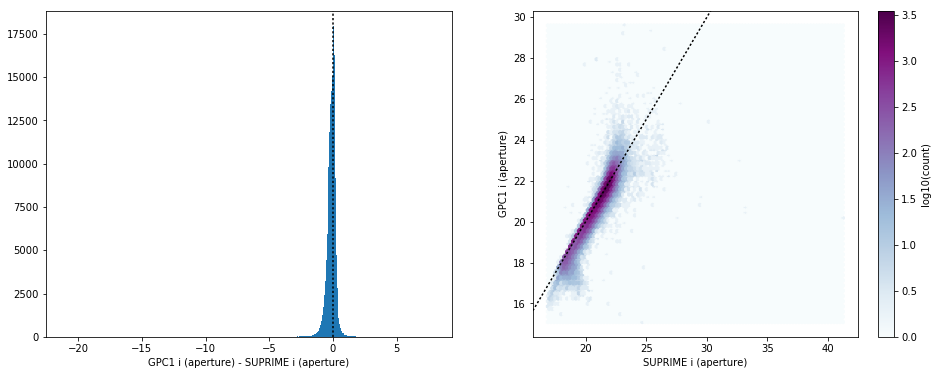

GPC1 i (total) - SUPRIME i (total) min / max: -10.21229362487793 / 4.299509048461914


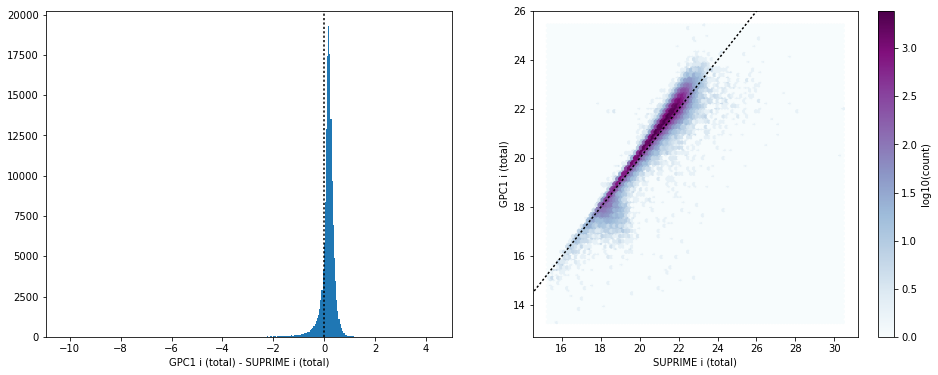

CFHT Megacam z (aperture) - WFC z (aperture) min / max: -7.095800399780273 / 11.994922637939453


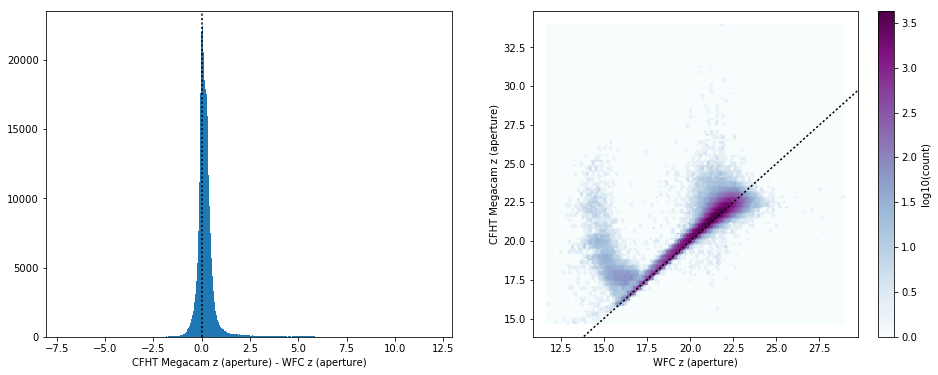

CFHT Megacam z (total) - WFC z (total) min / max: -7.20233154296875 / 14.031572341918945


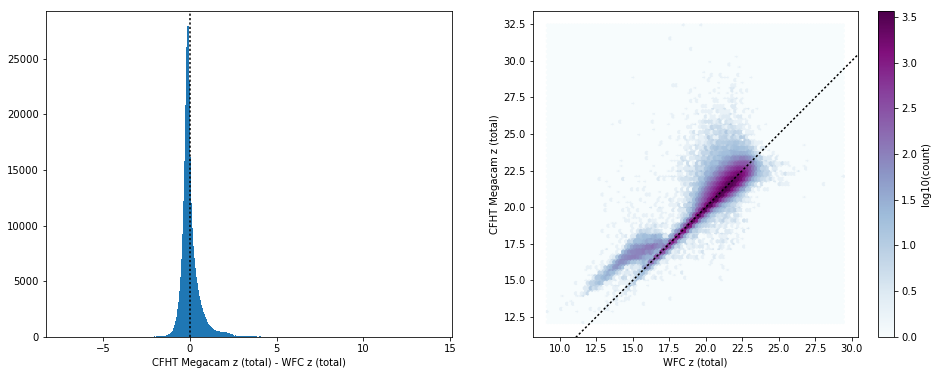

SUPRIME z (aperture) - WFC z (aperture) min / max: -6.920845031738281 / 36.7827033996582


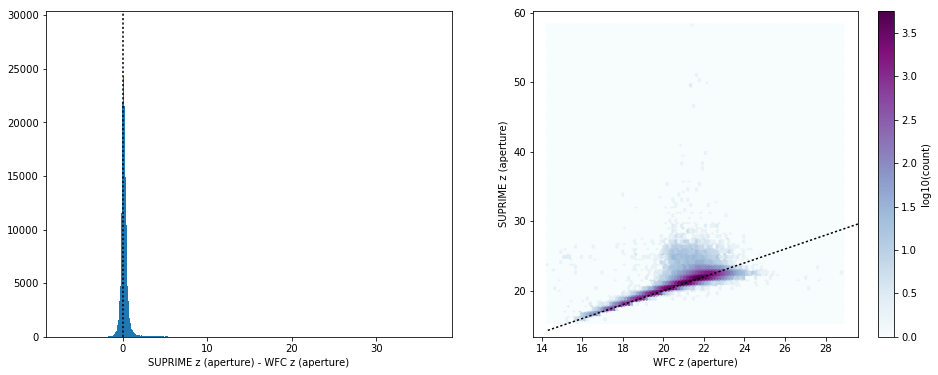

SUPRIME z (total) - WFC z (total) min / max: -7.451881408691406 / 38.856048583984375


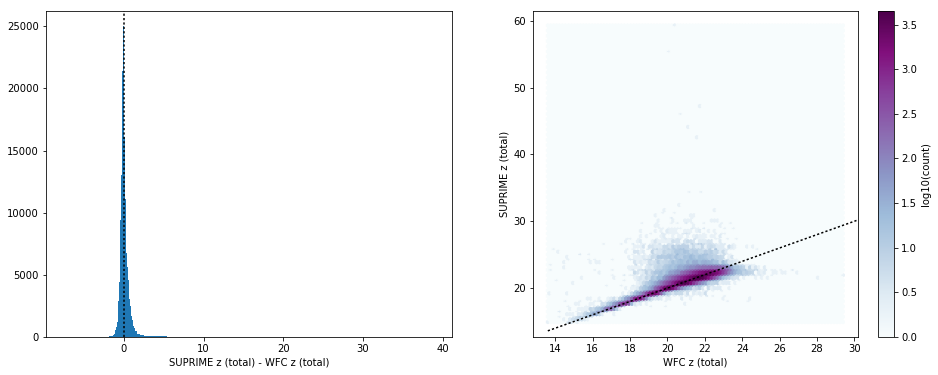

GPC1 z (aperture) - WFC z (aperture) min / max: -6.590299606323242 / 11.251898765563965


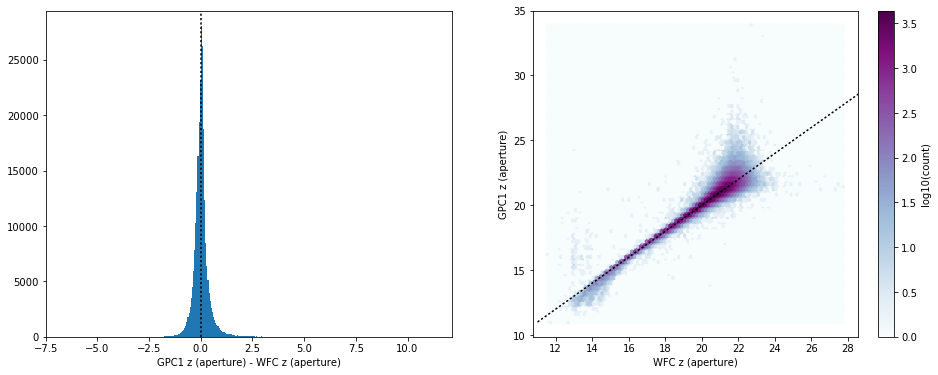

GPC1 z (total) - WFC z (total) min / max: -6.666799545288086 / 11.952099800109863


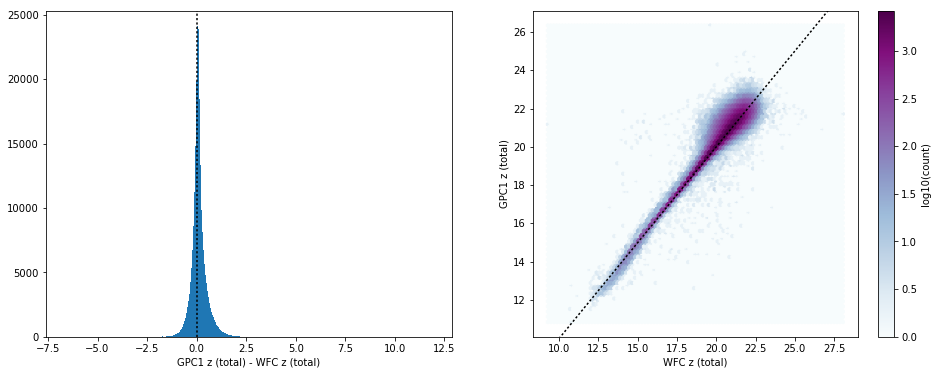

SUPRIME z (aperture) - CFHT Megacam z (aperture) min / max: -12.260868072509766 / 33.36268615722656


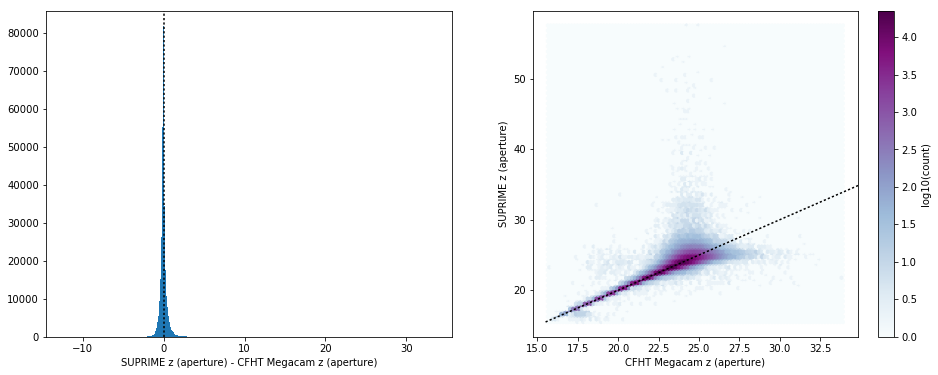

SUPRIME z (total) - CFHT Megacam z (total) min / max: -12.686359405517578 / 26.528608322143555


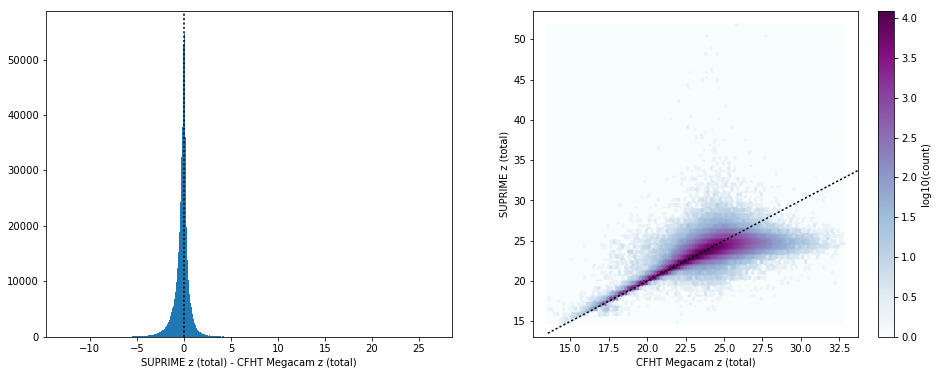

GPC1 z (aperture) - CFHT Megacam z (aperture) min / max: -12.501282691955566 / 12.042213439941406


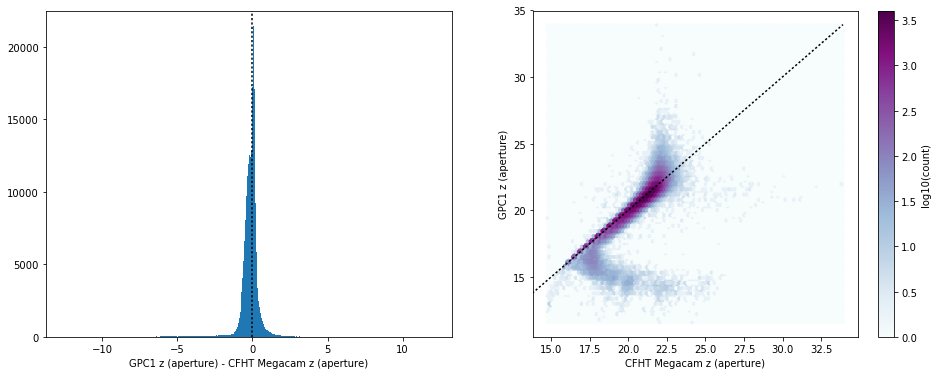

GPC1 z (total) - CFHT Megacam z (total) min / max: -14.044147491455078 / 6.308490753173828


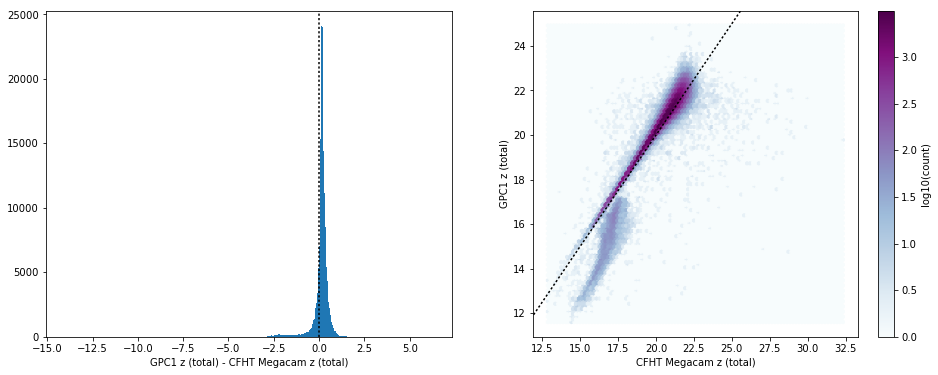

GPC1 z (aperture) - SUPRIME z (aperture) min / max: -21.049829483032227 / 11.831218719482422


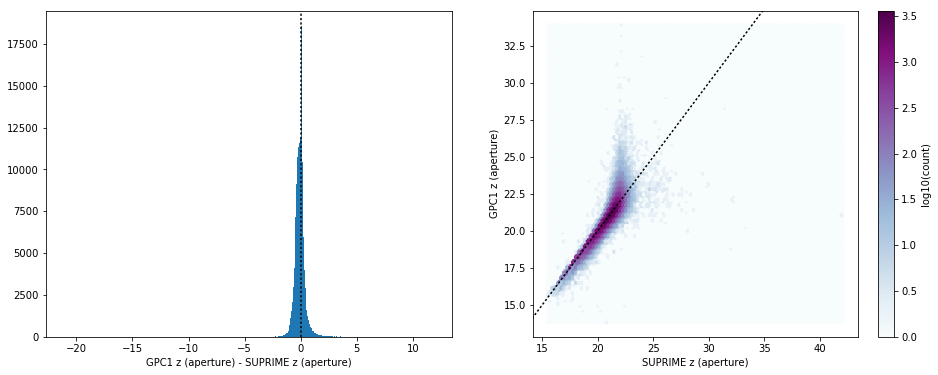

GPC1 z (total) - SUPRIME z (total) min / max: -9.994834899902344 / 4.559785842895508


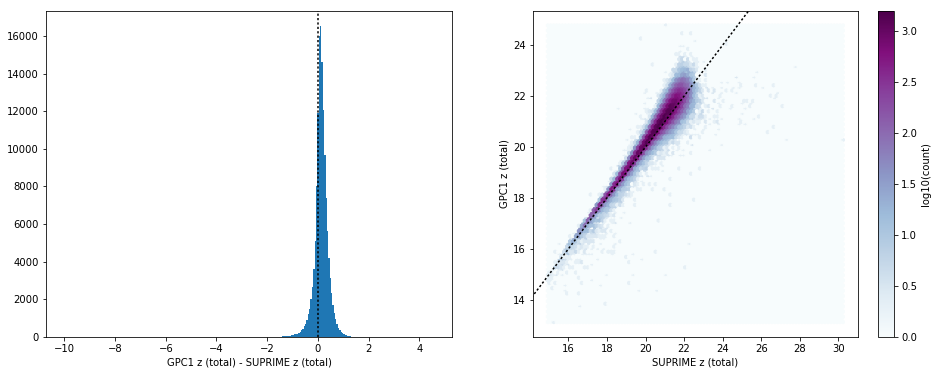

GPC1 y (aperture) - SUPRIME y (aperture) min / max: -27.283308029174805 / 10.779399871826172


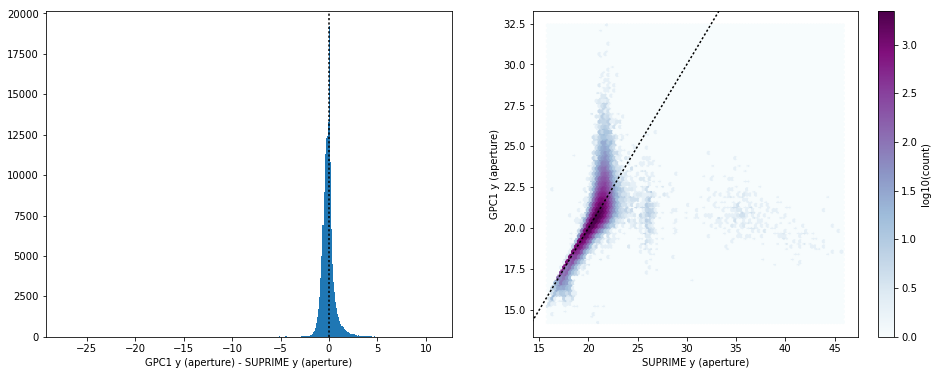

GPC1 y (total) - SUPRIME y (total) min / max: -26.15351676940918 / 4.937532424926758


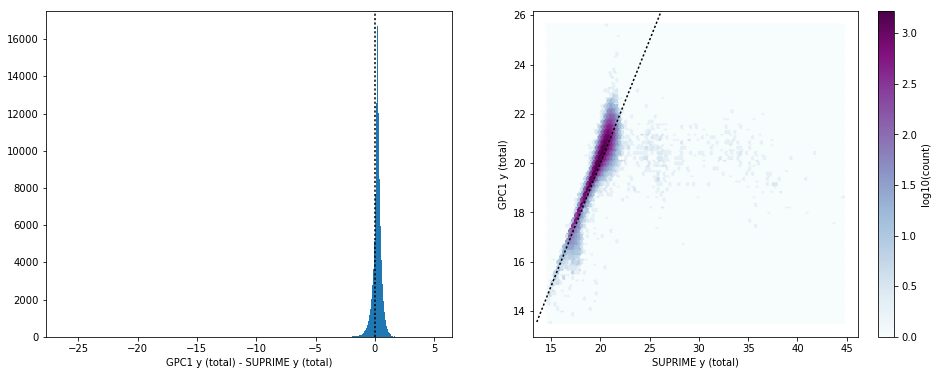

In [8]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands, y_bands]:
    for band1, band2 in itertools.combinations(band_of_a_kind, 2):
        
        basecol1, basecol2 = band1.replace(" ", "_").lower(), band2.replace(" ", "_").lower()
        
        col1, col2 = "m_ap_{}".format(basecol1), "m_ap_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (aperture)".format(band1), "{} (aperture)".format(band2)))
        
        col1, col2 = "m_{}".format(basecol1), "m_{}".format(basecol2)
        nb_compare_mags(master_catalogue[col1], master_catalogue[col2], 
                        labels=("{} (total)".format(band1), "{} (total)".format(band2)))

## III - Comparing magnitudes to reference bands

Cross-match the master list to SDSS and 2MASS to compare its magnitudes to SDSS and 2MASS ones.

In [9]:
master_catalogue_coords = SkyCoord(master_catalogue['ra'], master_catalogue['dec'])

### III.a - Comparing u, g, r, i, and z bands to SDSS

The catalogue is cross-matched to SDSS-DR13 withing 0.2 arcsecond. 

We compare the u, g, r, i, and z magnitudes to those from SDSS using `fiberMag` for the aperture magnitude and `petroMag`  for the total magnitude.

In [10]:
sdss = Table.read("../../dmu0/dmu0_SDSS-DR13/data/SDSS-DR13_ELAIS-N1.fits")
sdss_coords = SkyCoord(sdss['ra'] * u.deg, sdss['dec'] * u.deg)

idx, d2d, _ = sdss_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

sdss = sdss[mask]
ml_sdss_idx = idx[mask]

WFC u (aperture) - SDSS u (fiberMag) min / max: -6.054237365722656 / 8.458396911621094


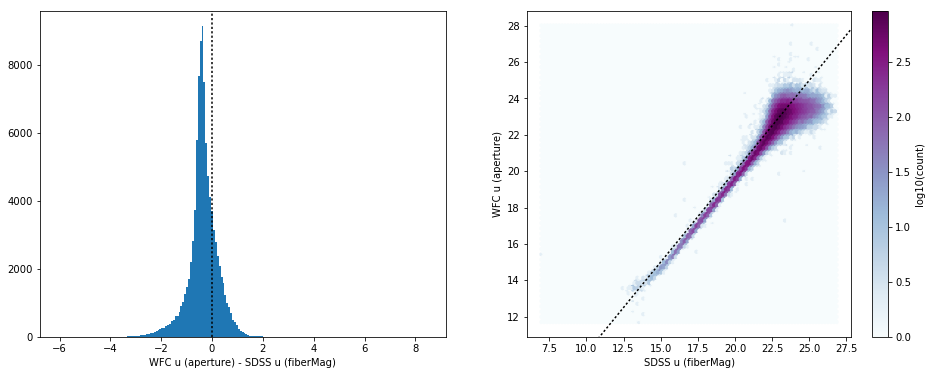

WFC u (total) - SDSS u (petroMag) min / max: -6.054237365722656 / 8.458396911621094


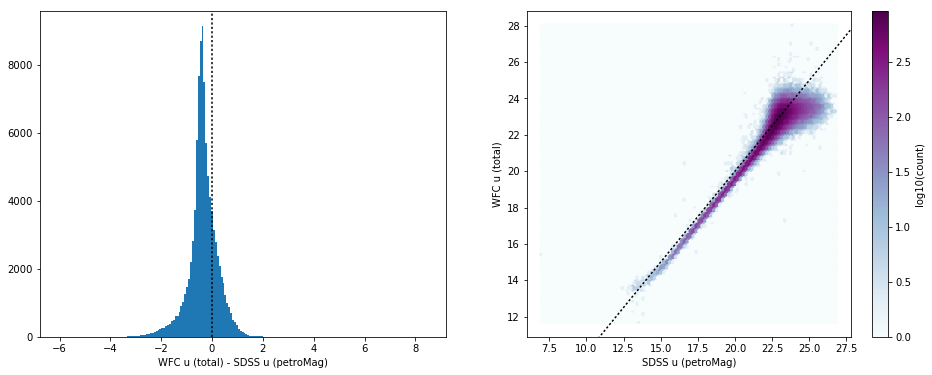

CFHT Megacam u (aperture) - SDSS u (fiberMag) min / max: -4.221920013427734 / 14.008743286132812


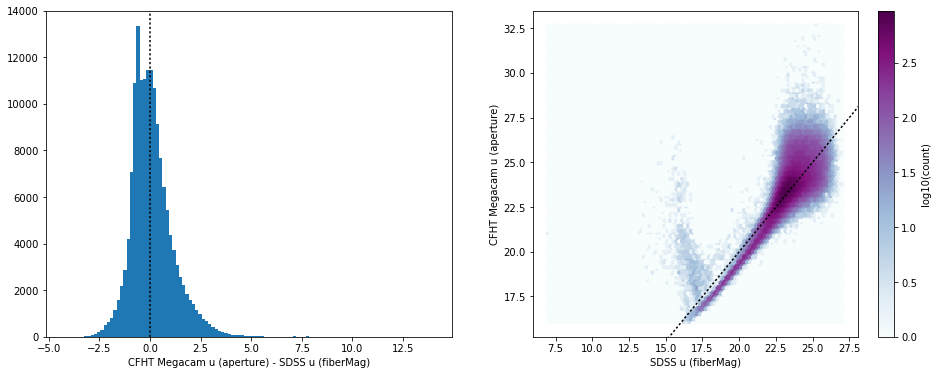

CFHT Megacam u (total) - SDSS u (petroMag) min / max: -4.221920013427734 / 14.008743286132812


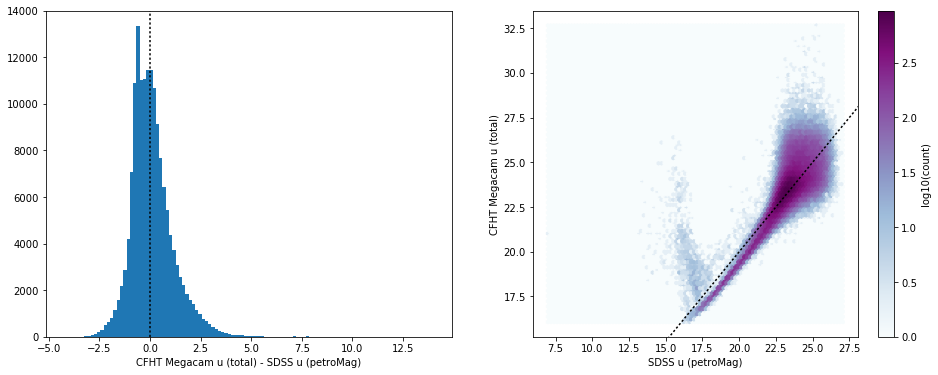

WFC g (aperture) - SDSS g (fiberMag) min / max: -13.903802871704102 / 3.8203506469726562


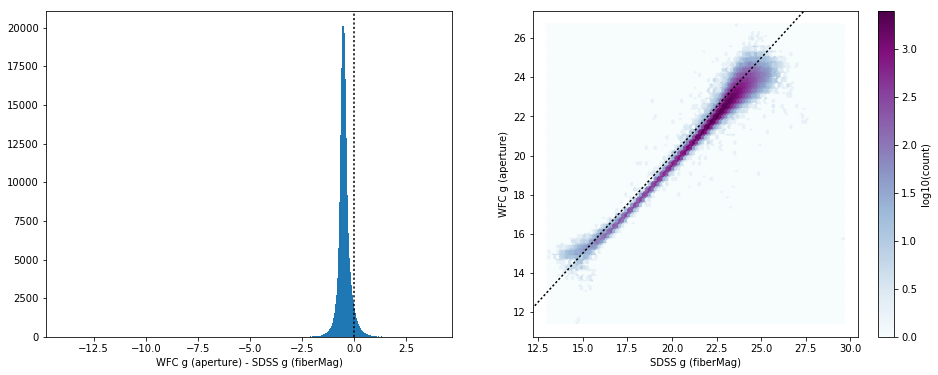

WFC g (total) - SDSS g (petroMag) min / max: -13.903802871704102 / 3.8203506469726562


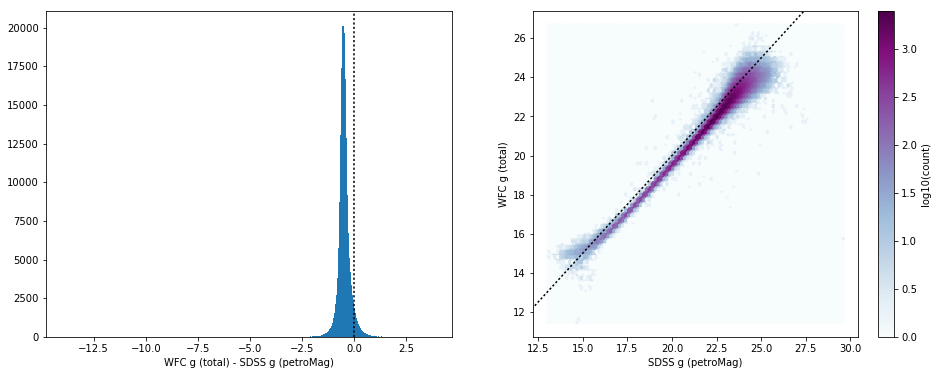

CFHT Megacam g (aperture) - SDSS g (fiberMag) min / max: -4.521080017089844 / 13.146224975585938


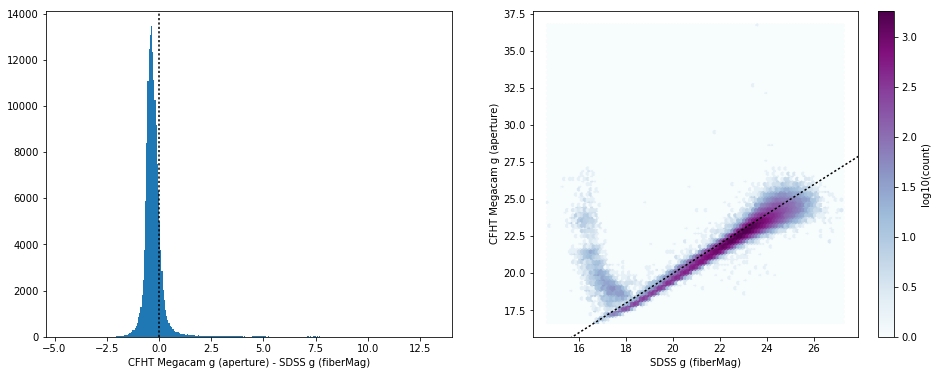

CFHT Megacam g (total) - SDSS g (petroMag) min / max: -4.521080017089844 / 13.146224975585938


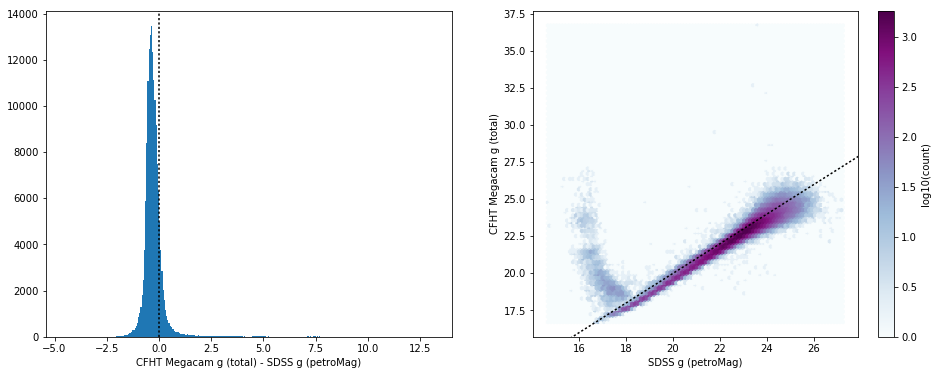

SUPRIME g (aperture) - SDSS g (fiberMag) min / max: -2.3895015716552734 / 27.126079559326172


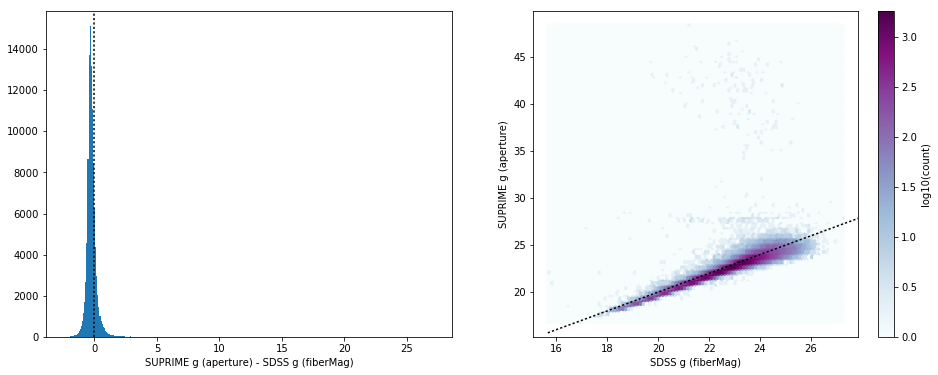

SUPRIME g (total) - SDSS g (petroMag) min / max: -2.3895015716552734 / 27.126079559326172


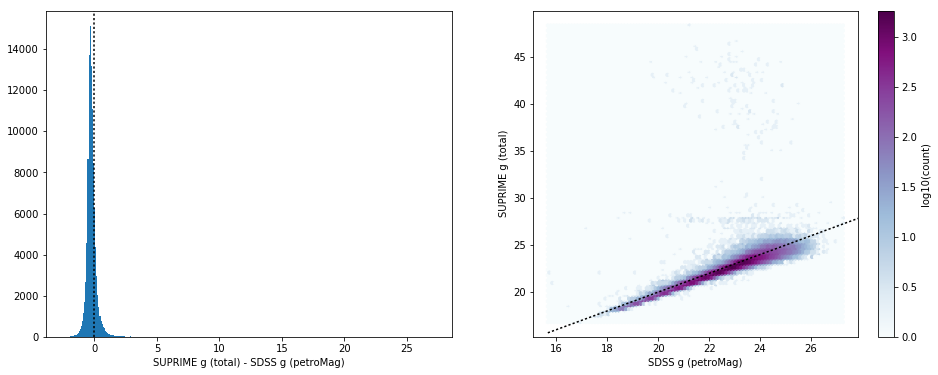

GPC1 g (aperture) - SDSS g (fiberMag) min / max: -7.5263214111328125 / 10.904970169067383


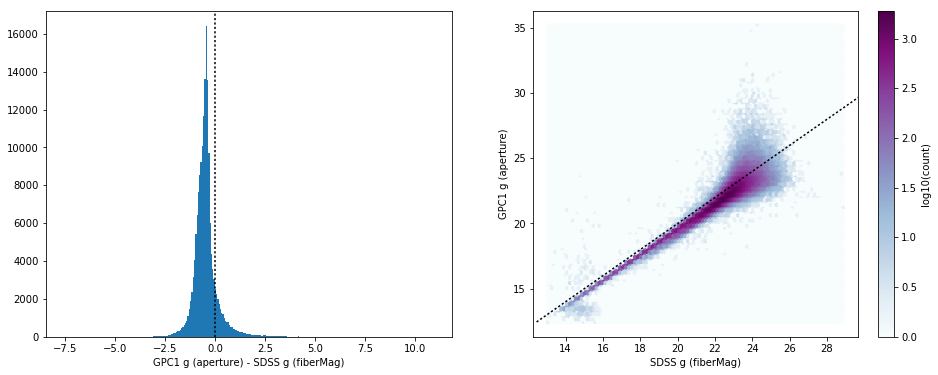

GPC1 g (total) - SDSS g (petroMag) min / max: -7.5263214111328125 / 10.904970169067383


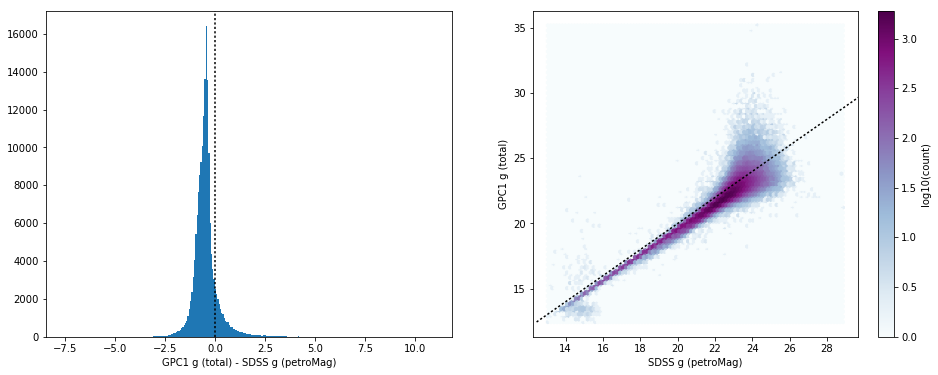

WFC r (aperture) - SDSS r (fiberMag) min / max: -9.089466094970703 / 5.897480010986328


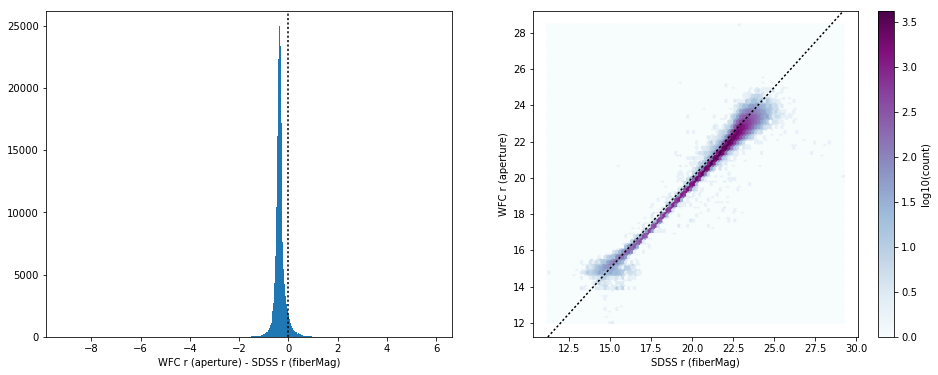

WFC r (total) - SDSS r (petroMag) min / max: -9.089466094970703 / 5.897480010986328


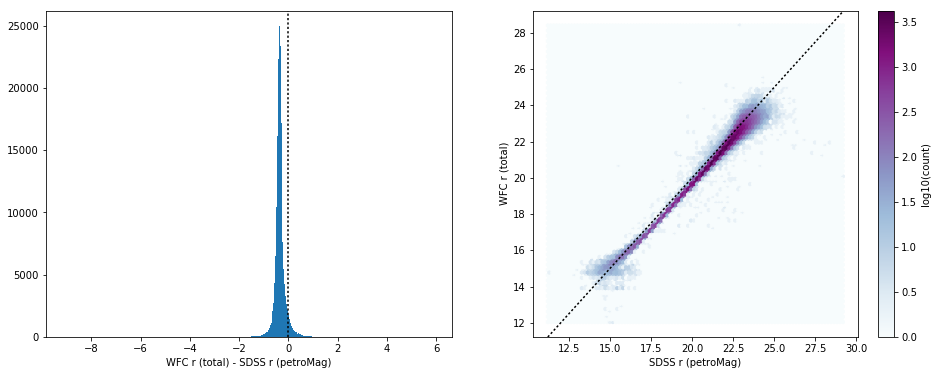

CFHT Megacam r (aperture) - SDSS r (fiberMag) min / max: -5.955713272094727 / 13.534361839294434


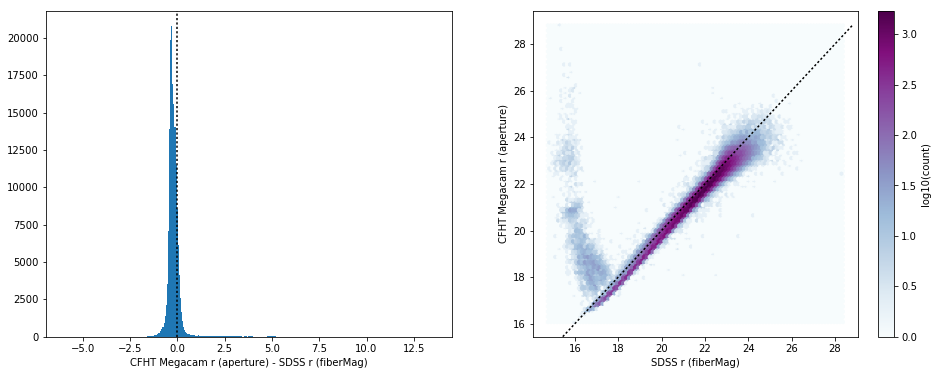

CFHT Megacam r (total) - SDSS r (petroMag) min / max: -5.955713272094727 / 13.534361839294434


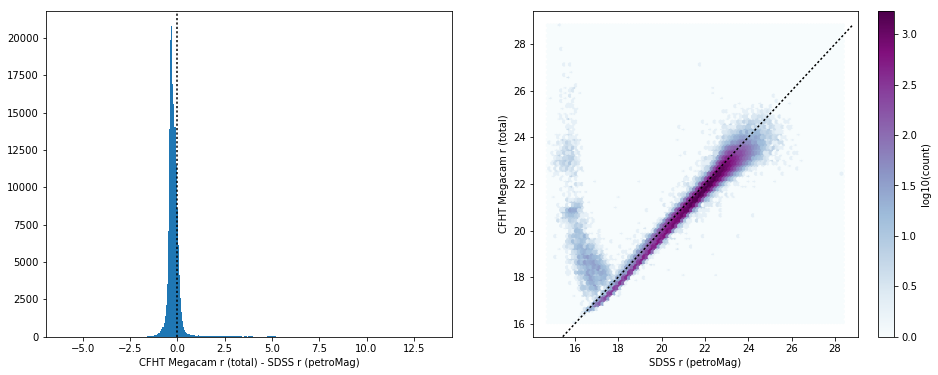

SUPRIME r (aperture) - SDSS r (fiberMag) min / max: -3.1653575897216797 / 26.930034637451172


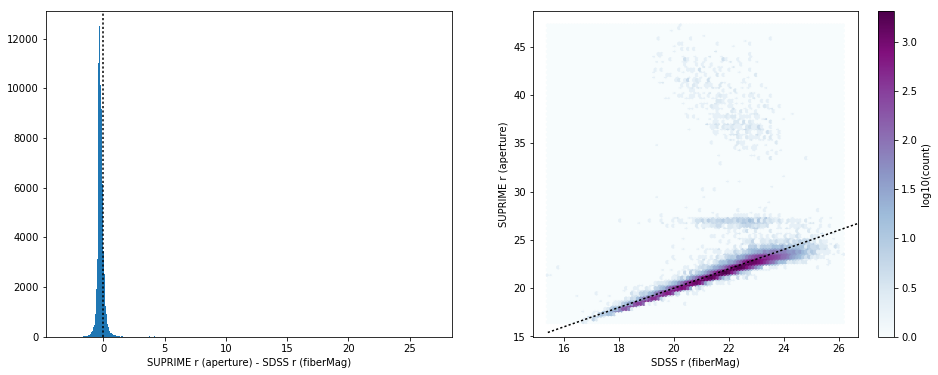

SUPRIME r (total) - SDSS r (petroMag) min / max: -3.1653575897216797 / 26.930034637451172


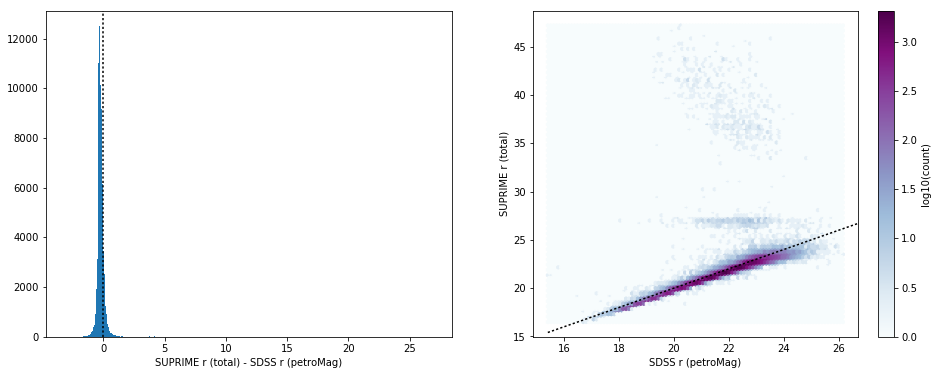

GPC1 r (aperture) - SDSS r (fiberMag) min / max: -9.684465408325195 / 8.203363418579102


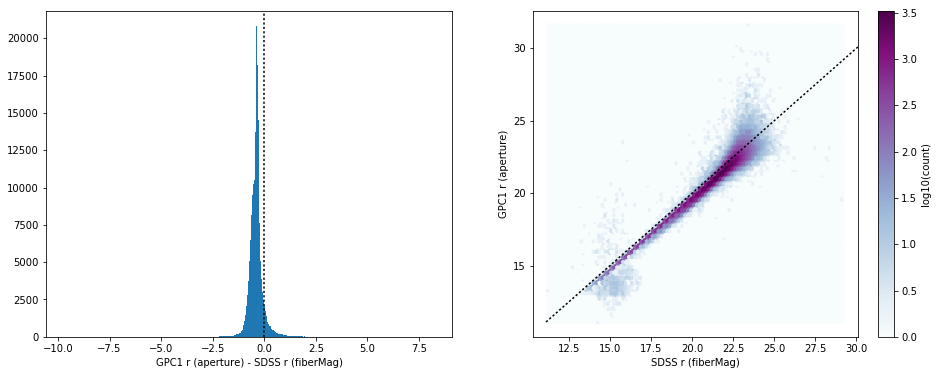

GPC1 r (total) - SDSS r (petroMag) min / max: -9.684465408325195 / 8.203363418579102


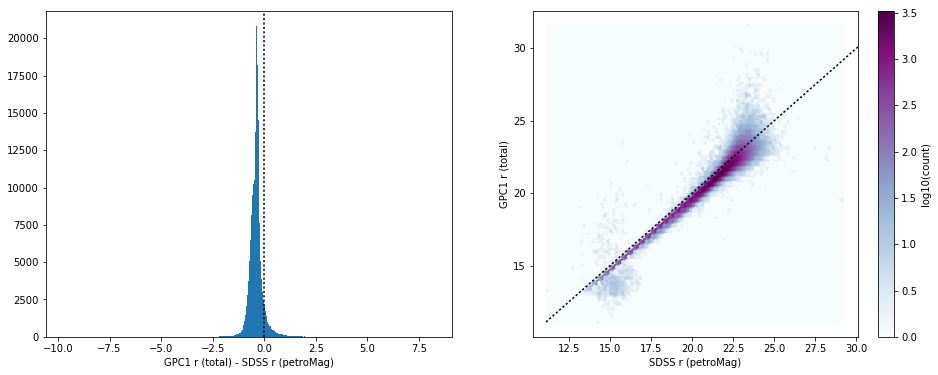

WFC i (aperture) - SDSS i (fiberMag) min / max: -7.744133949279785 / 6.387470245361328


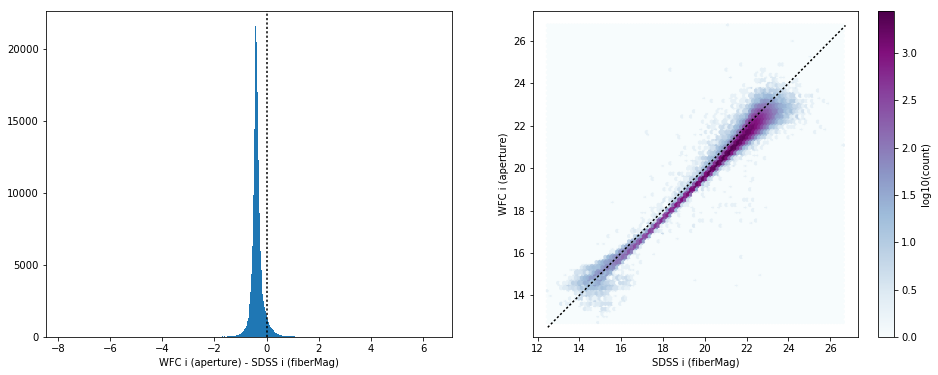

WFC i (total) - SDSS i (petroMag) min / max: -7.744133949279785 / 6.387470245361328


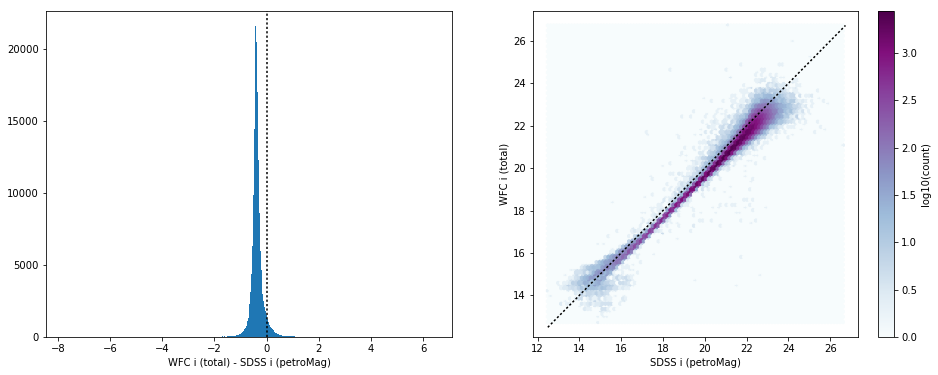

SUPRIME i (aperture) - SDSS i (fiberMag) min / max: -3.850278854370117 / 12.377250671386719


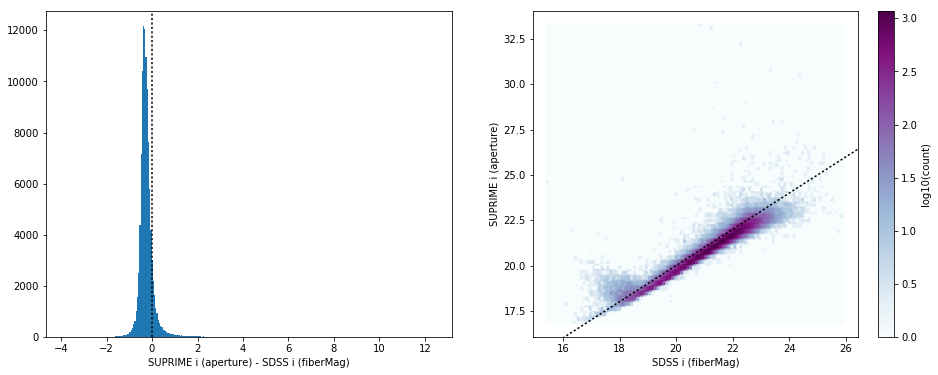

SUPRIME i (total) - SDSS i (petroMag) min / max: -3.850278854370117 / 12.377250671386719


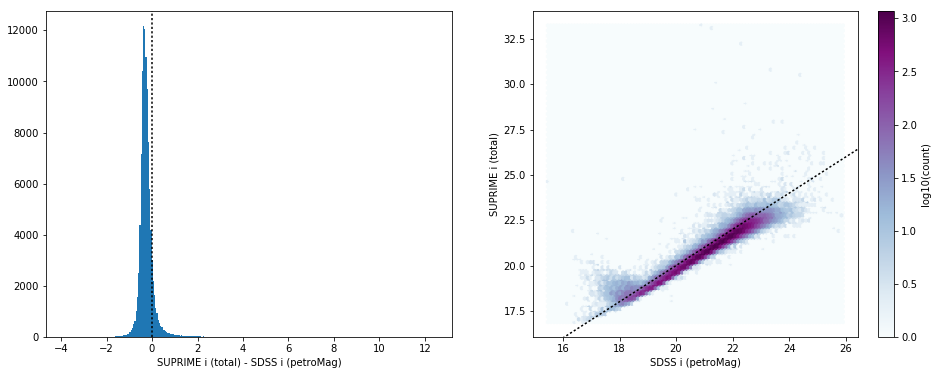

GPC1 i (aperture) - SDSS i (fiberMag) min / max: -5.126115798950195 / 7.698373794555664


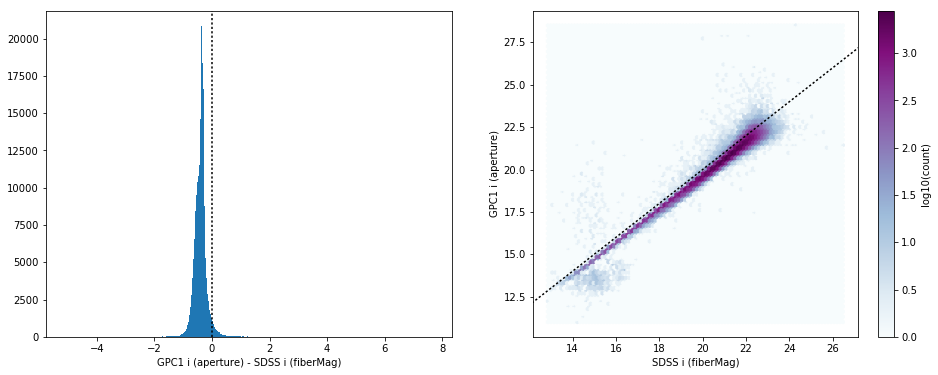

GPC1 i (total) - SDSS i (petroMag) min / max: -5.126115798950195 / 7.698373794555664


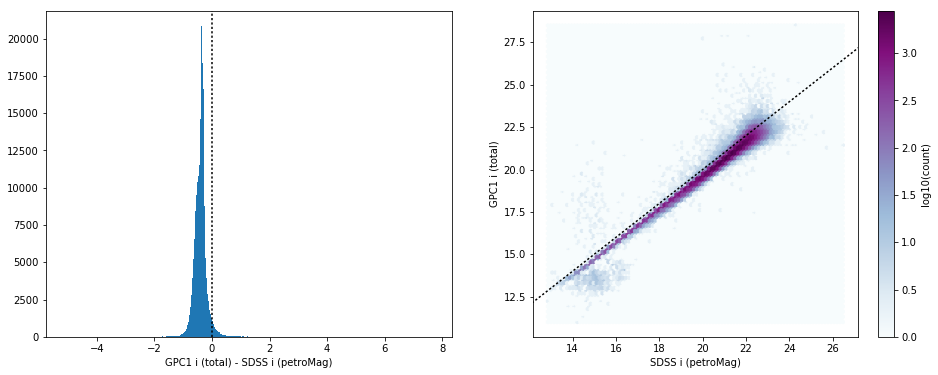

WFC z (aperture) - SDSS z (fiberMag) min / max: -4.472288131713867 / 7.737405776977539


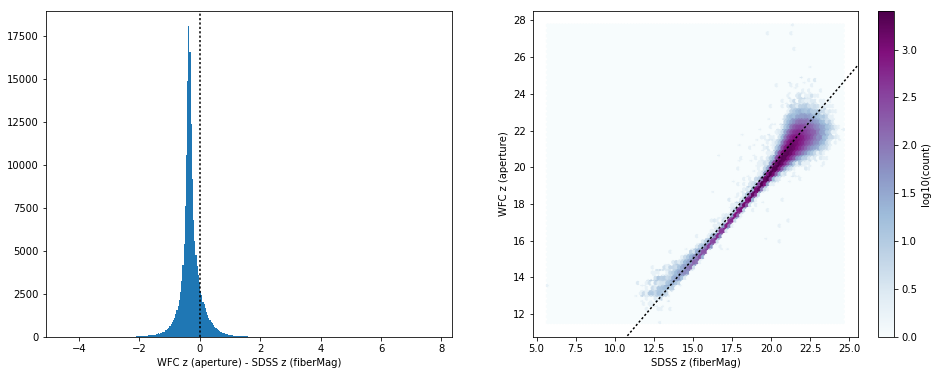

WFC z (total) - SDSS z (petroMag) min / max: -4.472288131713867 / 7.737405776977539


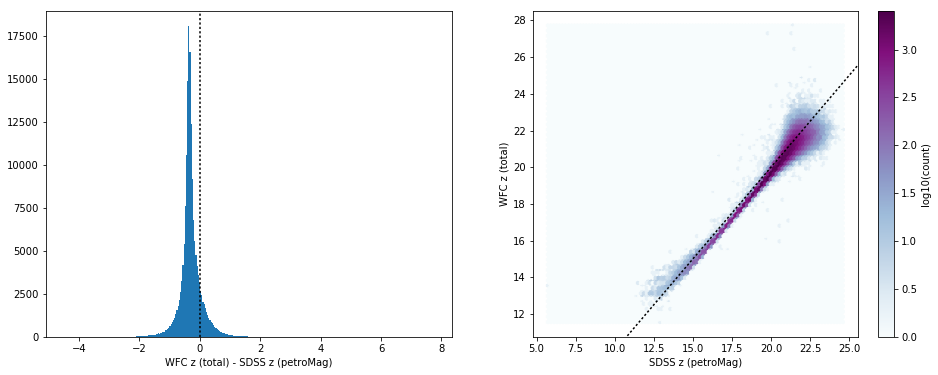

CFHT Megacam z (aperture) - SDSS z (fiberMag) min / max: -4.987695693969727 / 12.28380012512207


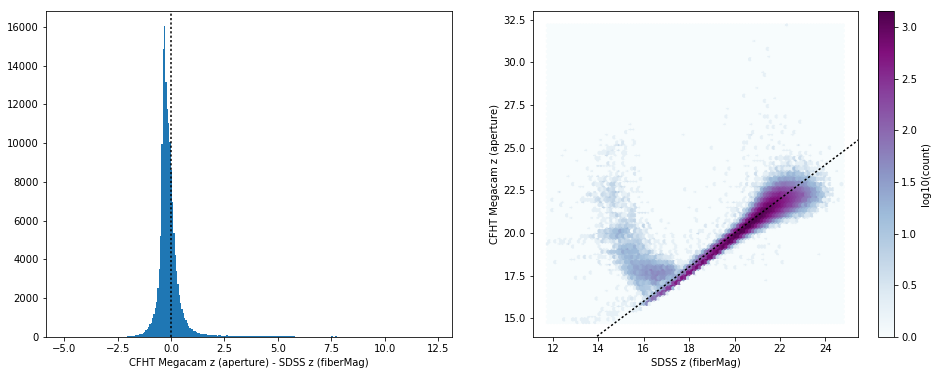

CFHT Megacam z (total) - SDSS z (petroMag) min / max: -4.987695693969727 / 12.28380012512207


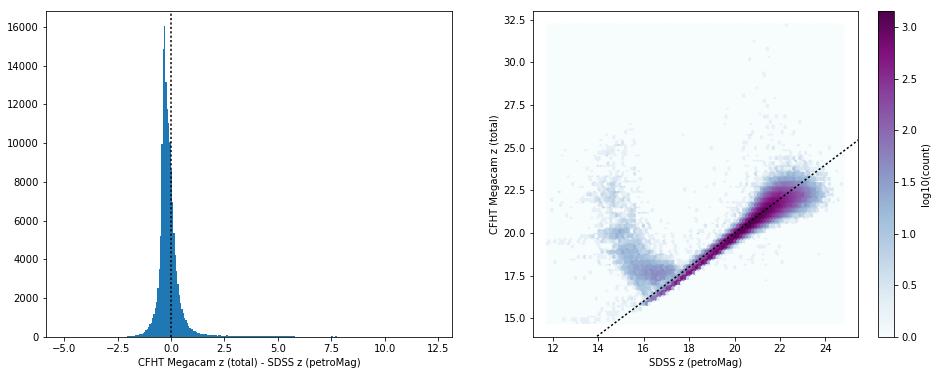

SUPRIME z (aperture) - SDSS z (fiberMag) min / max: -2.912992477416992 / 33.314064025878906


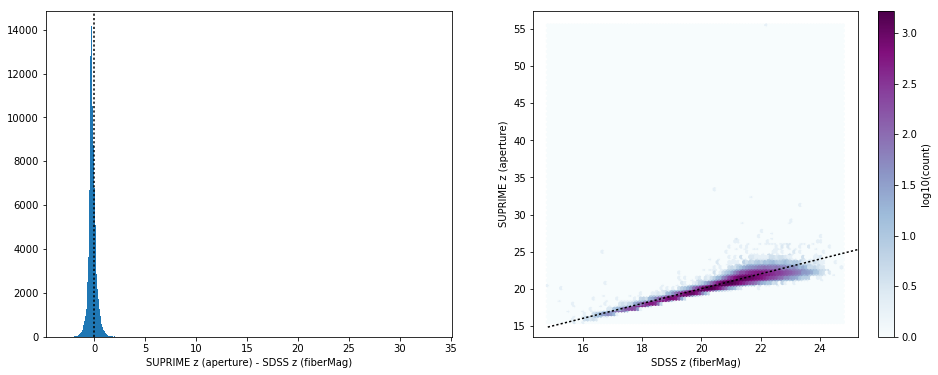

SUPRIME z (total) - SDSS z (petroMag) min / max: -2.912992477416992 / 33.314064025878906


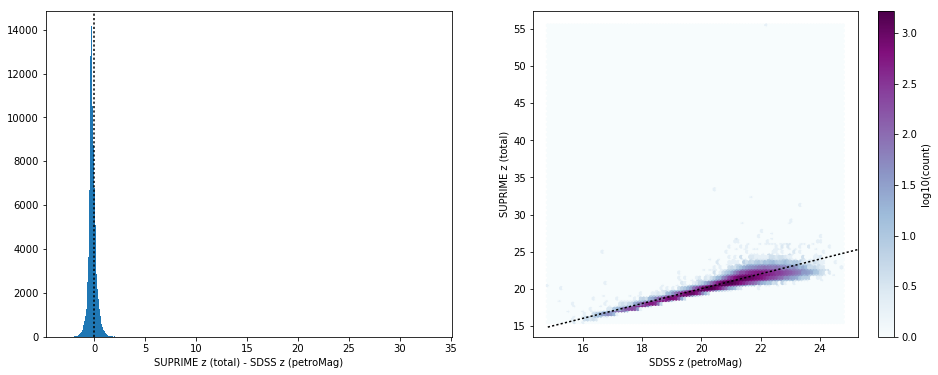

GPC1 z (aperture) - SDSS z (fiberMag) min / max: -6.84623908996582 / 11.156867980957031


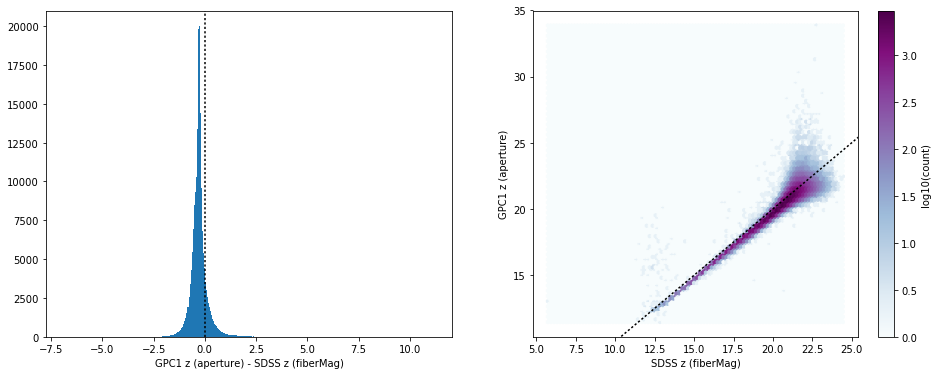

GPC1 z (total) - SDSS z (petroMag) min / max: -6.84623908996582 / 11.156867980957031


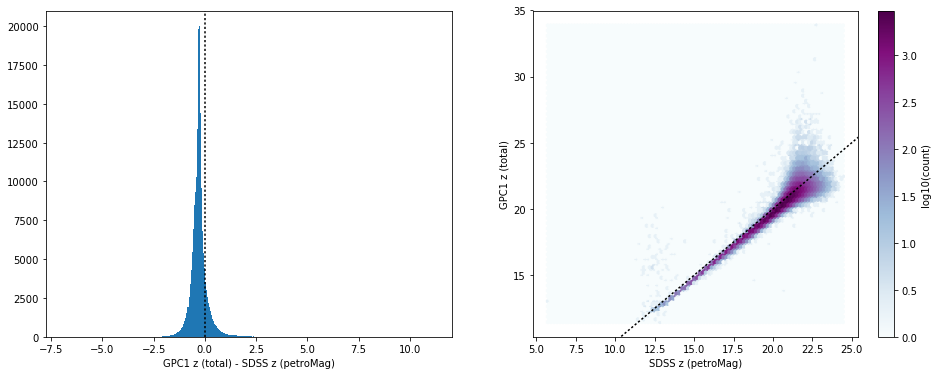

In [11]:
for band_of_a_kind in [u_bands, g_bands, r_bands, i_bands, z_bands]:
    for band in band_of_a_kind:
        
        sdss_mag_ap = sdss["fiberMag_{}".format(band[-1])]
        master_cat_mag_ap = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
    
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (fiberMag)".format(band[-1]), "{} (aperture)".format(band)))
    
        sdss_mag_tot = sdss["petroMag_{}".format(band[-1])]
        master_cat_mag_tot = master_catalogue["m_ap_{}".format(band.replace(" ", "_").lower())][ml_sdss_idx]
        
        nb_compare_mags(sdss_mag_ap, master_cat_mag_ap,
                        labels=("SDSS {} (petroMag)".format(band[-1]), "{} (total)".format(band)))

### III.b - Comparing J and K bands to 2MASS

The catalogue is cross-matched to 2MASS-PSC withing 0.2 arcsecond. 

We compare the UKIDSS total J and K magnitudes to those from 2MASS.

In [12]:
twomass = Table.read("../../dmu0/dmu0_2MASS-point-sources/data/2MASS-PSC_ELAIS-N1.fits")
twomass_coords = SkyCoord(twomass['raj2000'], twomass['dej2000'])

idx, d2d, _ = twomass_coords.match_to_catalog_sky(master_catalogue_coords)
mask = (d2d < 0.2 * u.arcsec)

twomass = twomass[mask]
ml_twomass_idx = idx[mask]

UKIDSS J (total) - 2MASS J min / max: -2.2490740890502927 / 5.001253997802735


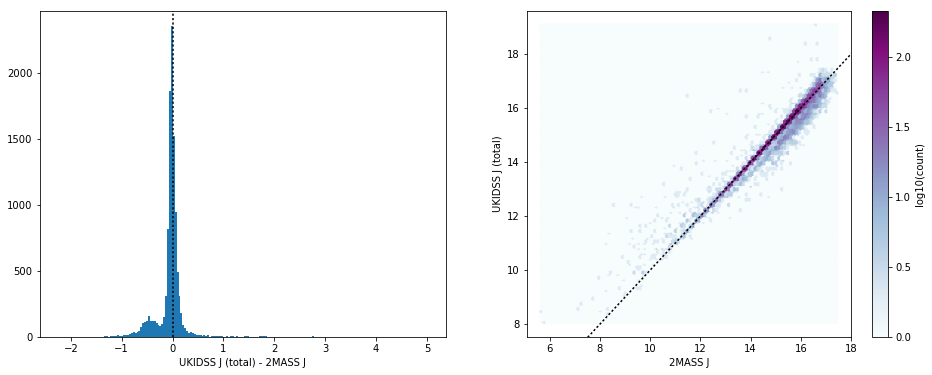

In [13]:
nb_compare_mags(twomass['jmag'], master_catalogue['m_ukidss_j'][ml_twomass_idx],
                labels=("2MASS J", "UKIDSS J (total)"))

UKIDSS K (total) - 2MASS K min / max: -2.2481118774414064 / 11.322524047851562


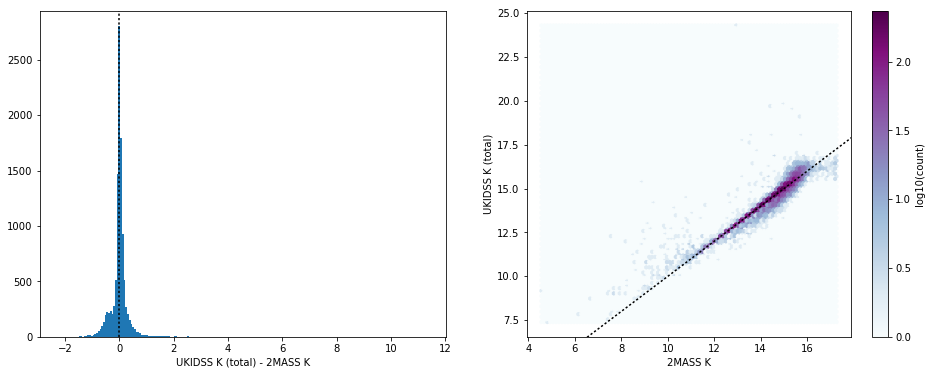

In [14]:
nb_compare_mags(twomass['kmag'], master_catalogue['m_ukidss_k'][ml_twomass_idx],
                labels=("2MASS K", "UKIDSS K (total)"))